## Conectar google colab con Kaggle

El [API de Kaggle](https://www.kaggle.com/general/74235) puede utilizarse para mover datos facilmente a otros entornos

In [32]:
! pip install -q kaggle

In [33]:
from google.colab import files
files.upload();

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [34]:
!mkdir ~/.kaggle    #make a dir
!cp kaggle.json ~/.kaggle/   #cp file
!chmod 600 ~/.kaggle/kaggle.json #change permisssions
!ls ~/ -a #list all dirs in ~/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
.   .bashrc  .config   .jupyter  .keras		.local	.profile    .wget-hsts
..  .cache   .ipython  .kaggle	 .launchpadlib	.npm	.tmux.conf


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Data

In [36]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [37]:
!unzip house-prices-advanced-regression-techniques.zip

unzip:  cannot find or open house-prices-advanced-regression-techniques.zip, house-prices-advanced-regression-techniques.zip.zip or house-prices-advanced-regression-techniques.zip.ZIP.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from scipy.stats import f_oneway
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [72]:
#Read the train data
train = pd.read_csv('train.csv')

# Read the test data
test = pd.read_csv('test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print(train.shape)
print('Test columns:', test.columns.tolist())
print(test.shape)

Train columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [73]:
#
print(train.shape)
print(test.shape)
valores_nulos = train.isnull().sum()
valores_nulos.sort_values(ascending = False)

(1460, 81)
(1459, 80)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

## Analisis exploratorio de datos

We will be using the library YDATA-PROFILING  to get and exhaustive exploratory statistical analysis of the data set. This is called Data Profiling.

You can get information about this library in https://github.com/ydataai/ydata-profiling

In [ ]:
#install the library and its dependencies
!pip install ydata_profiling

In [13]:
#import the roport generator to profile the data set
from ydata_profiling import ProfileReport

ImportError: cannot import name 'Buffer' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

In [14]:
output_path="/content/drive/MyDrive/Proyecto Tech MIDS/Modelos"
profile = ProfileReport(train, title="Perfiles de datos/Profiling Report")
profile.to_file(output_file=output_path+'/trainprofiling.html')
profile = ProfileReport(test, title="Profiling Report")
profile.to_file(output_file=output_path+'Perfiles de datos/testprofiling.html')

NameError: name 'ProfileReport' is not defined

## Exploración de variables

### Exploración variables numéricas

In [74]:
# Identification of numeric columns
num_features = train.columns[train.dtypes != "object"]
print(num_features)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Correlacion de variables numéricas

In [75]:
corr={}
for var in num_features:
  corr[var]=train[var]. corr (train['SalePrice'])
sorted(corr.items(),key=lambda item: item[1],reverse=True)

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838044),
 ('GrLivArea', 0.7086244776126523),
 ('GarageCars', 0.6404091972583529),
 ('GarageArea', 0.6234314389183618),
 ('TotalBsmtSF', 0.6135805515591956),
 ('1stFlrSF', 0.6058521846919147),
 ('FullBath', 0.5606637627484449),
 ('TotRmsAbvGrd', 0.5337231555820282),
 ('YearBuilt', 0.5228973328794969),
 ('YearRemodAdd', 0.5071009671113865),
 ('GarageYrBlt', 0.48636167748786097),
 ('MasVnrArea', 0.4774930470957163),
 ('Fireplaces', 0.46692883675152724),
 ('BsmtFinSF1', 0.3864198062421532),
 ('LotFrontage', 0.35179909657067804),
 ('WoodDeckSF', 0.3244134445681294),
 ('2ndFlrSF', 0.3193338028320681),
 ('OpenPorchSF', 0.3158562271160555),
 ('HalfBath', 0.2841076755947831),
 ('LotArea', 0.2638433538714056),
 ('BsmtFullBath', 0.22712223313149382),
 ('BsmtUnfSF', 0.21447910554696892),
 ('BedroomAbvGr', 0.16821315430073988),
 ('ScreenPorch', 0.11144657114291105),
 ('PoolArea', 0.09240354949187321),
 ('MoSold', 0.046432245223819384),
 ('3SsnPorch'

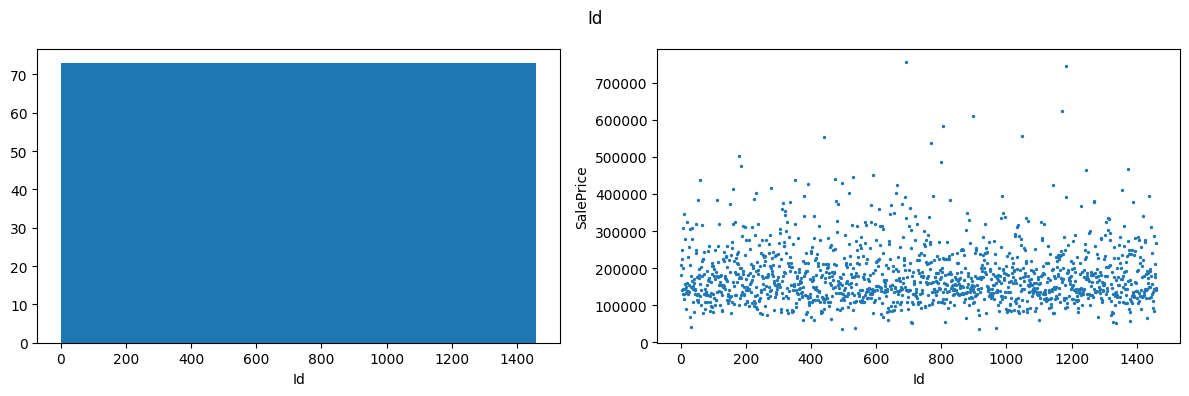

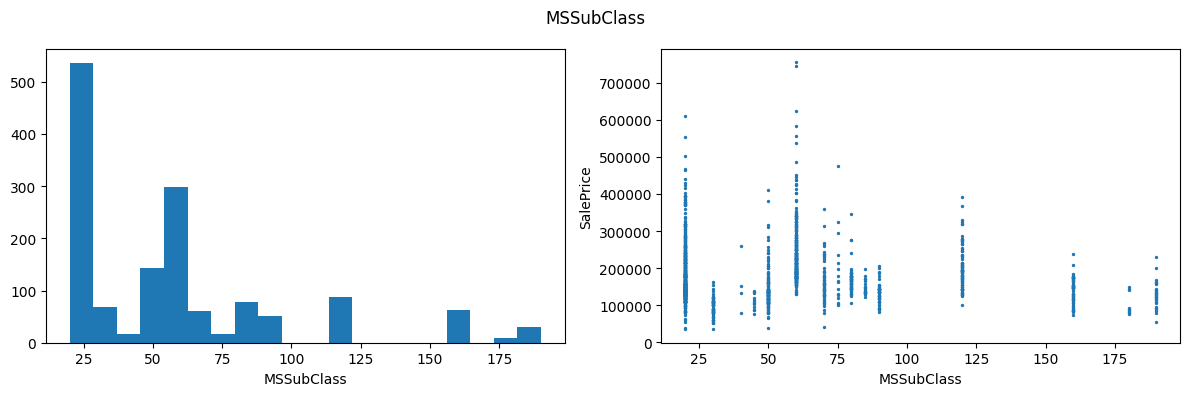

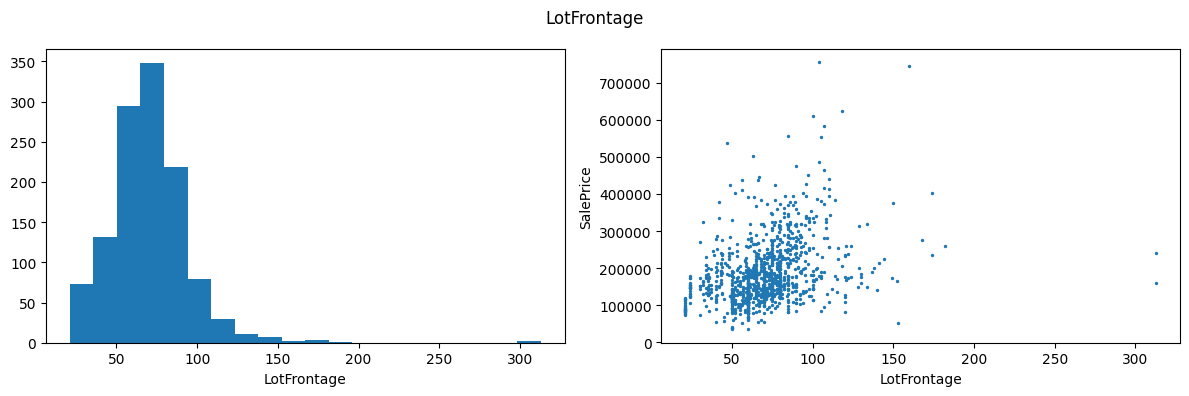

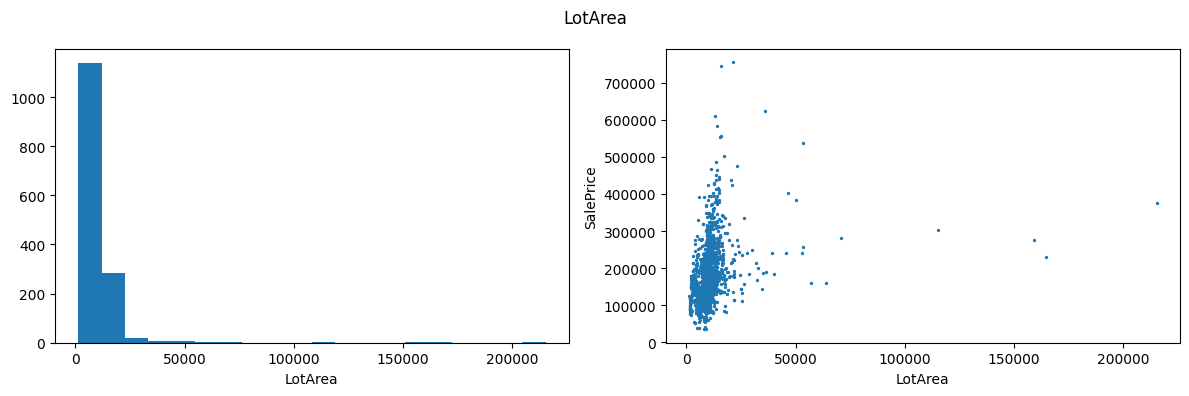

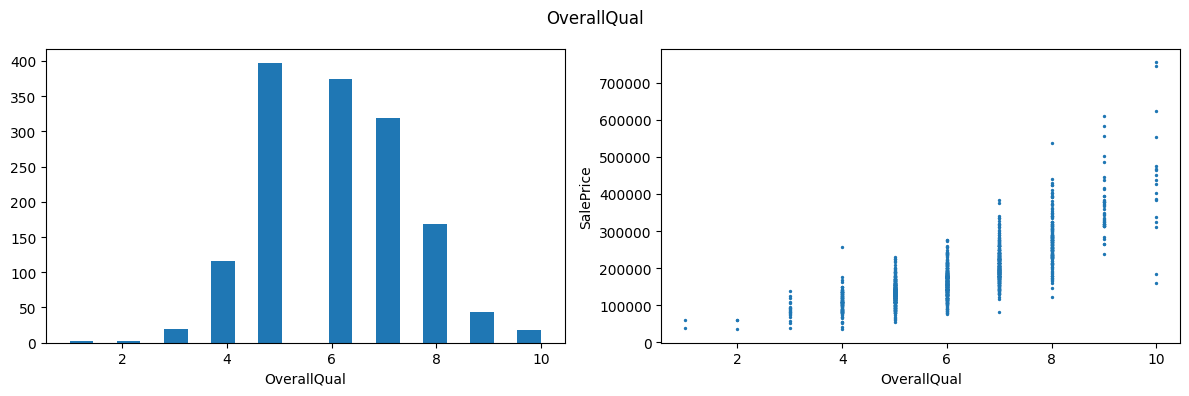

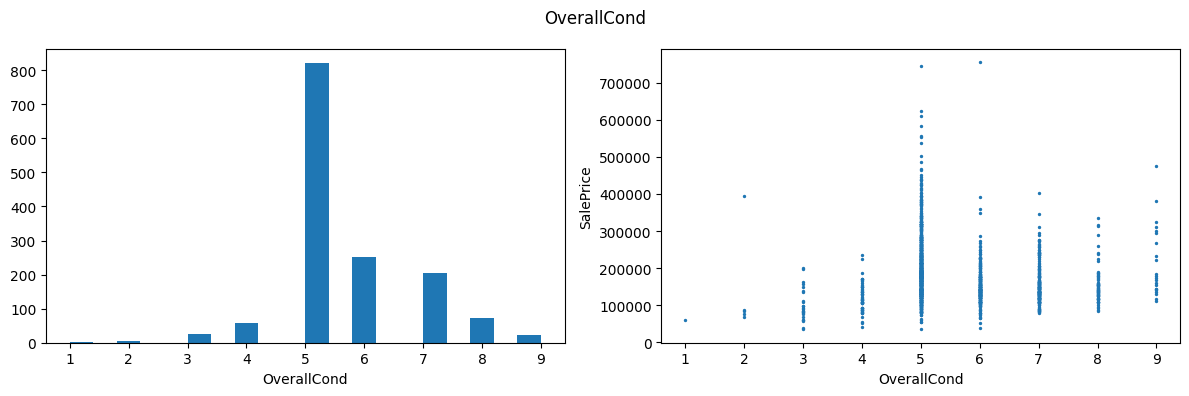

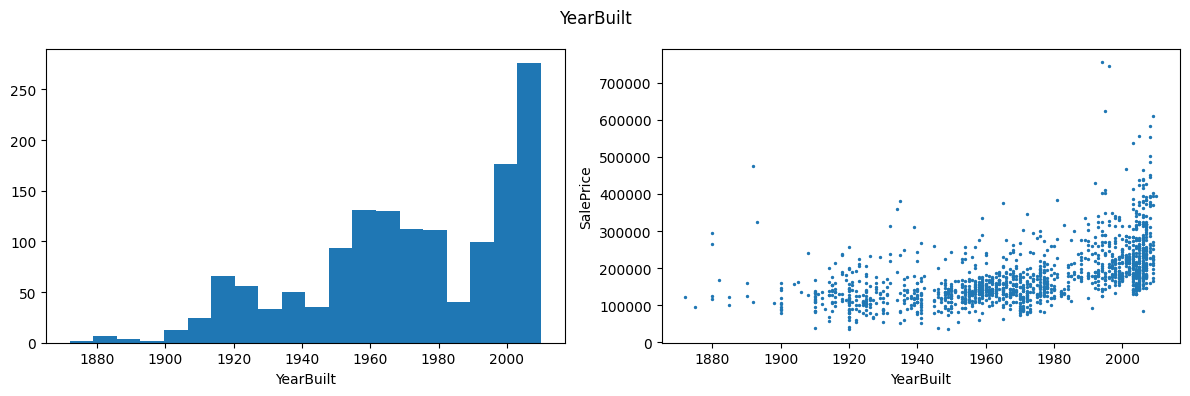

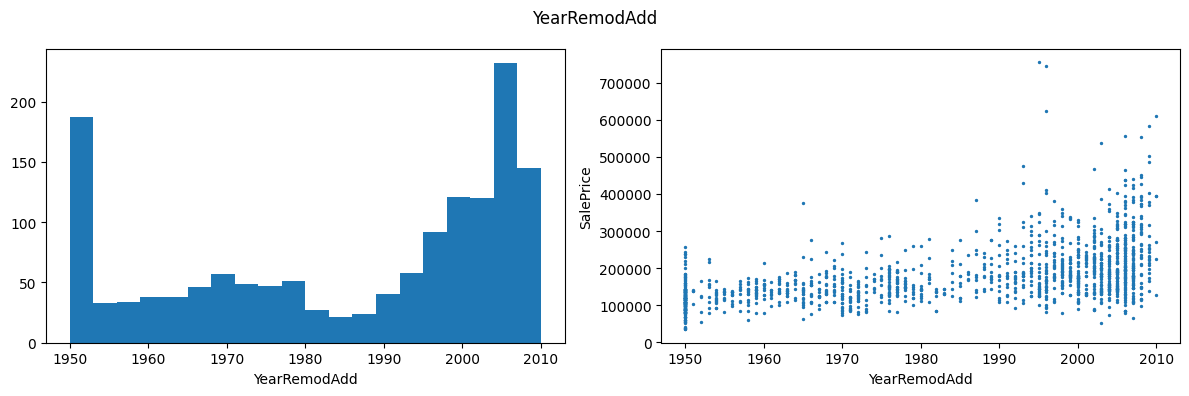

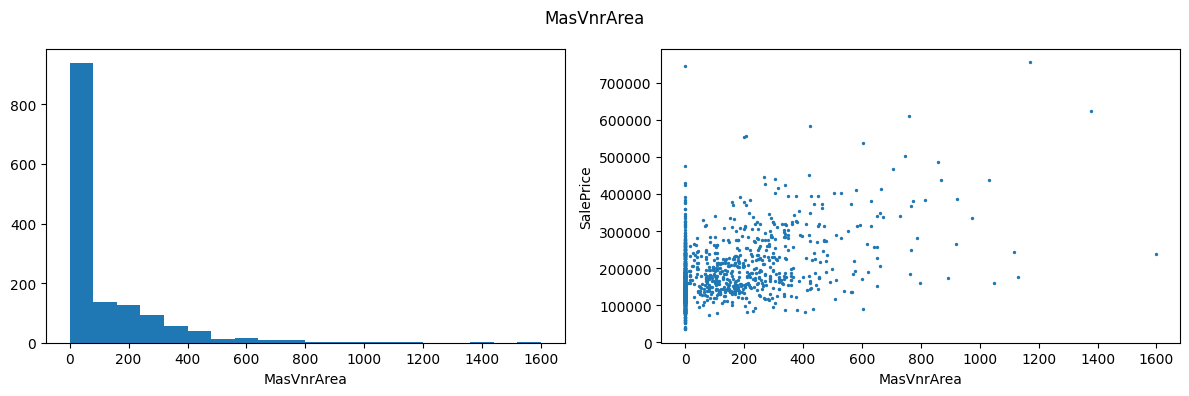

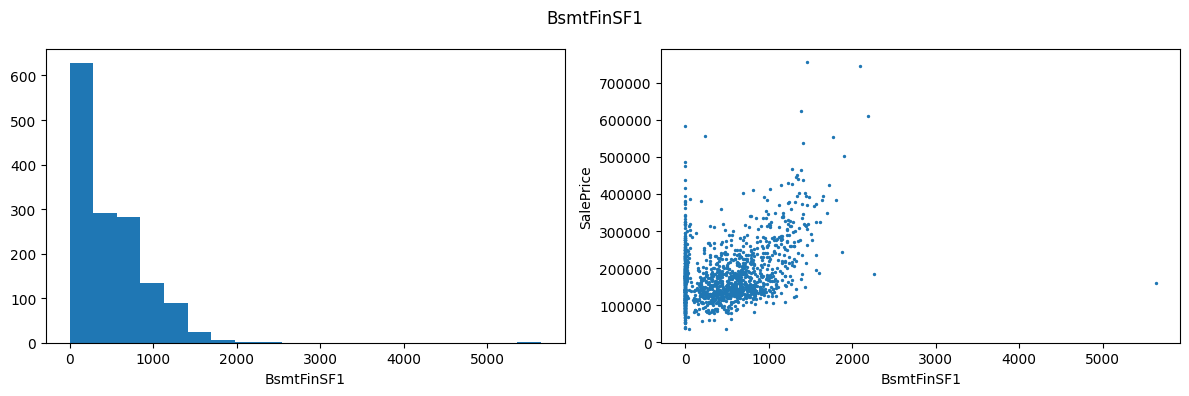

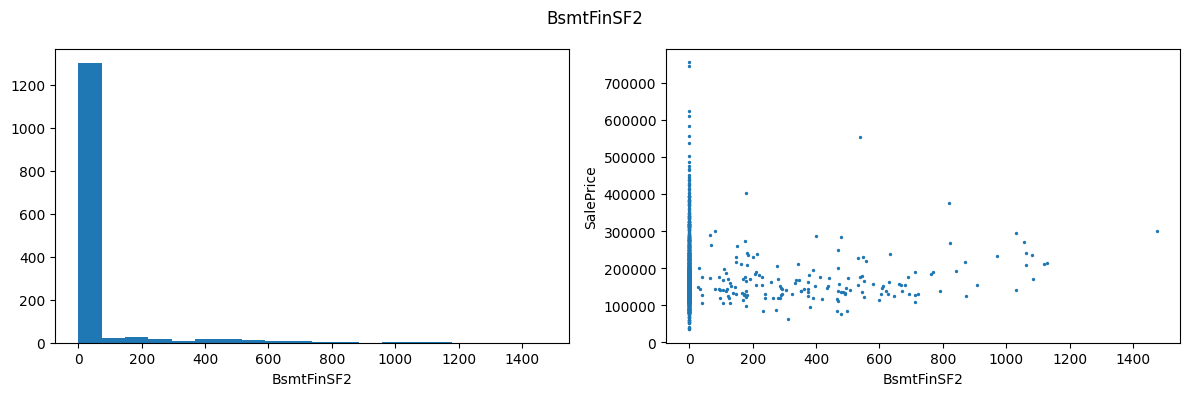

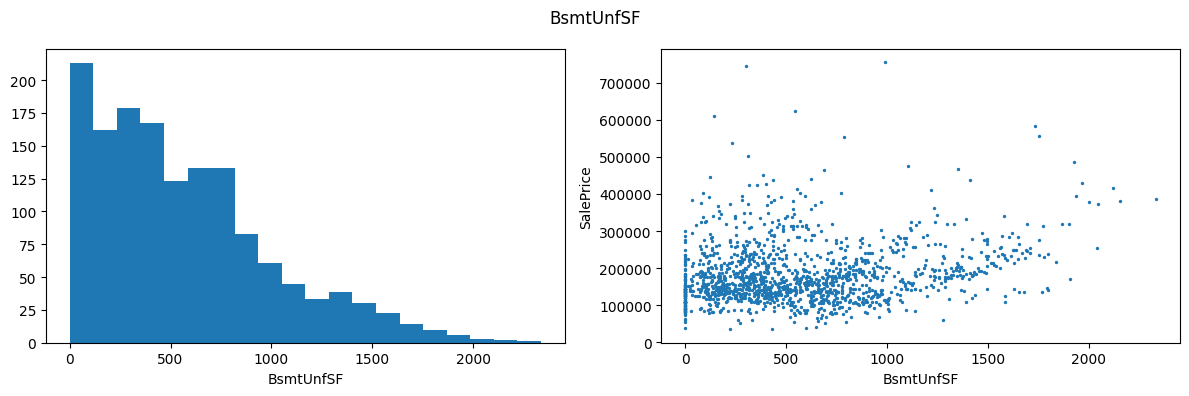

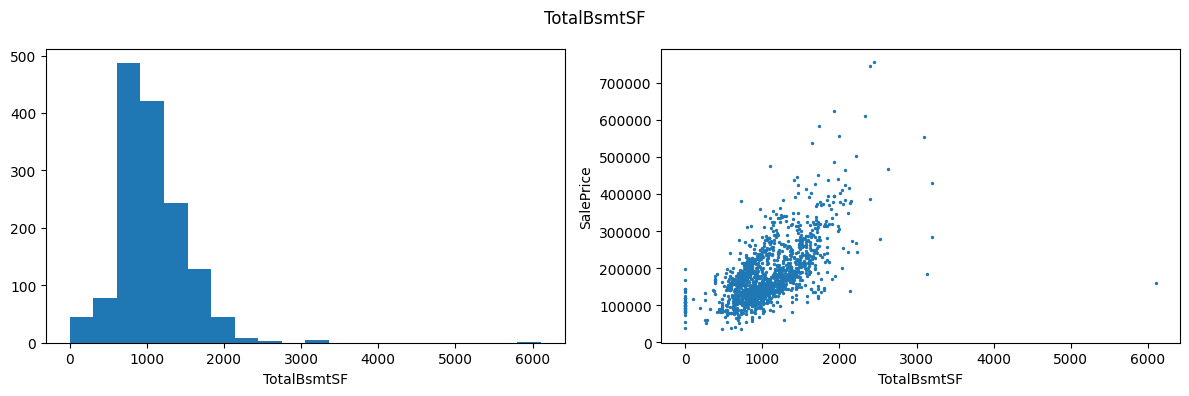

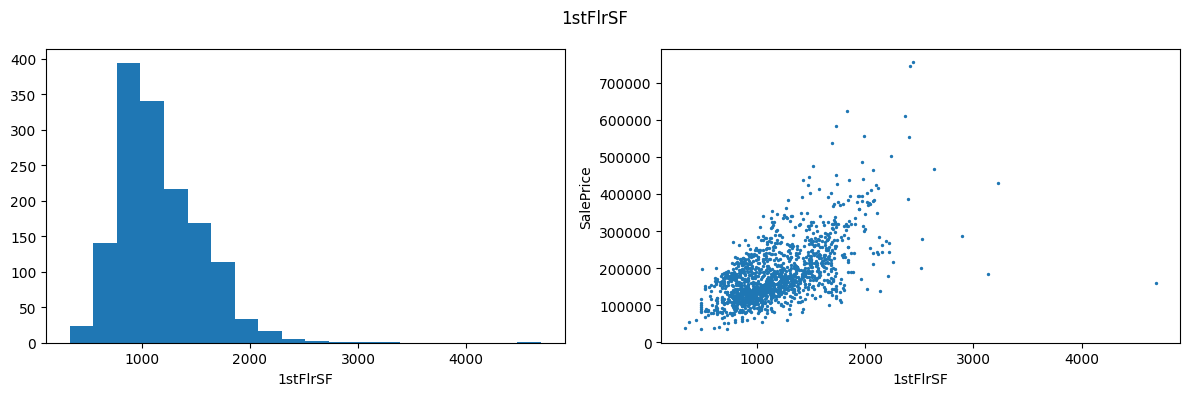

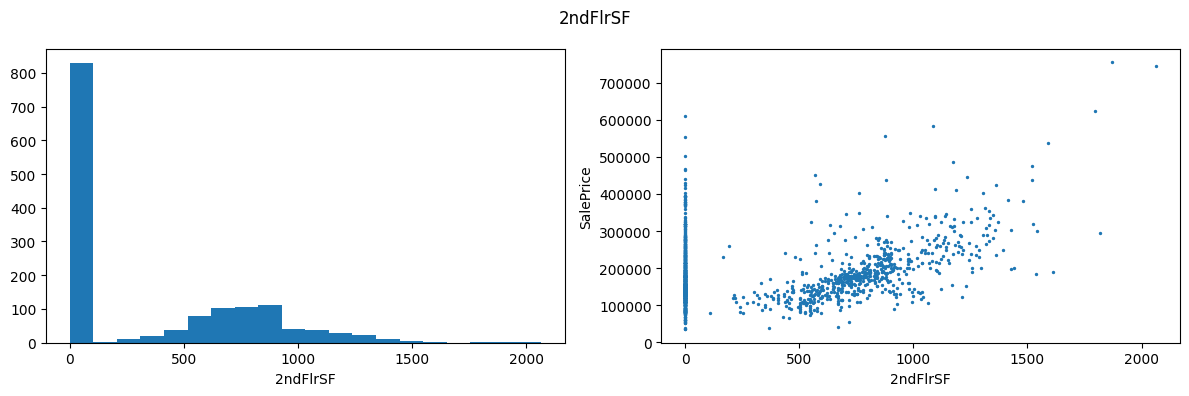

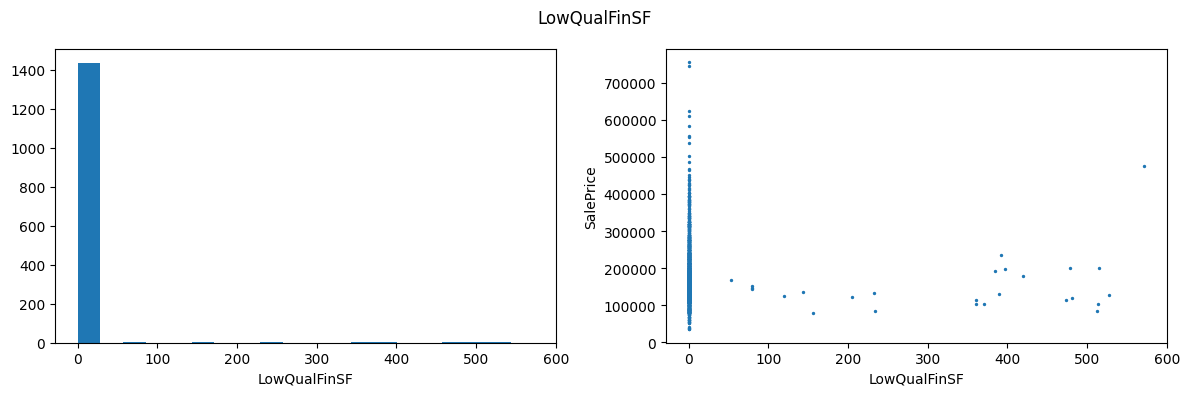

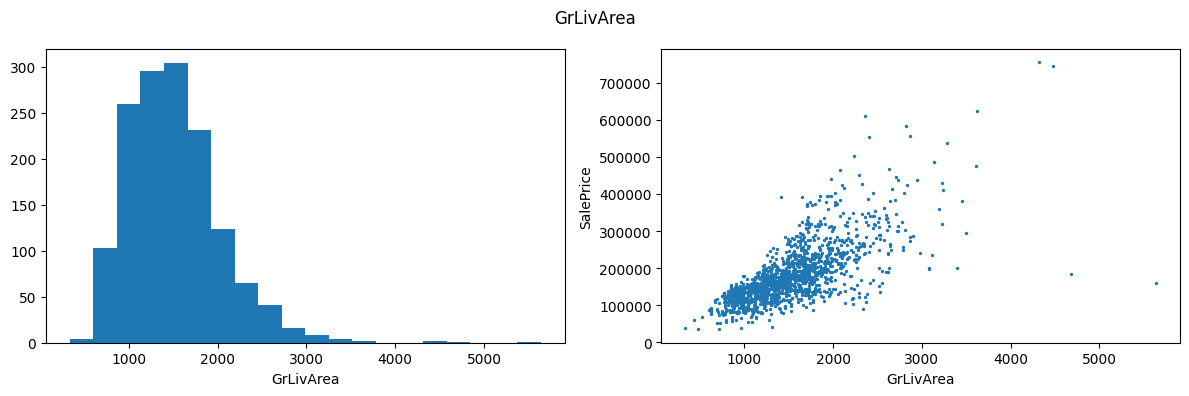

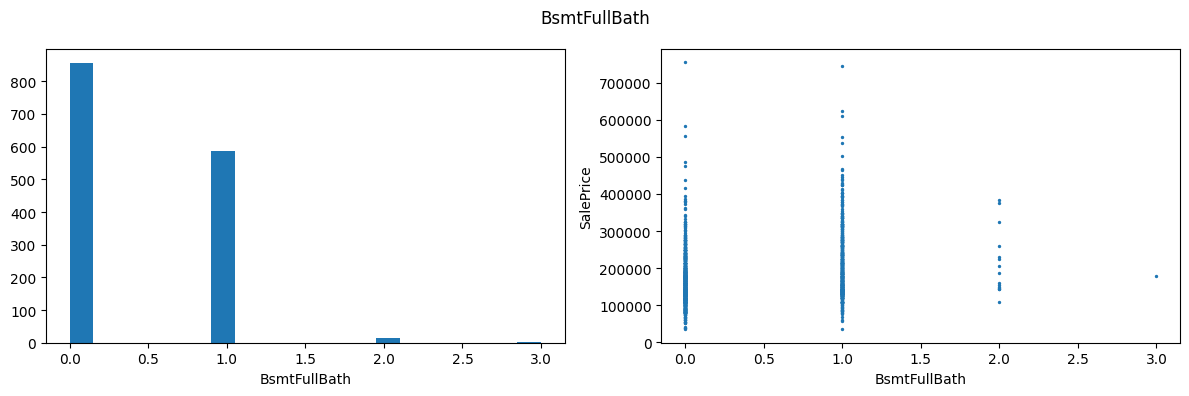

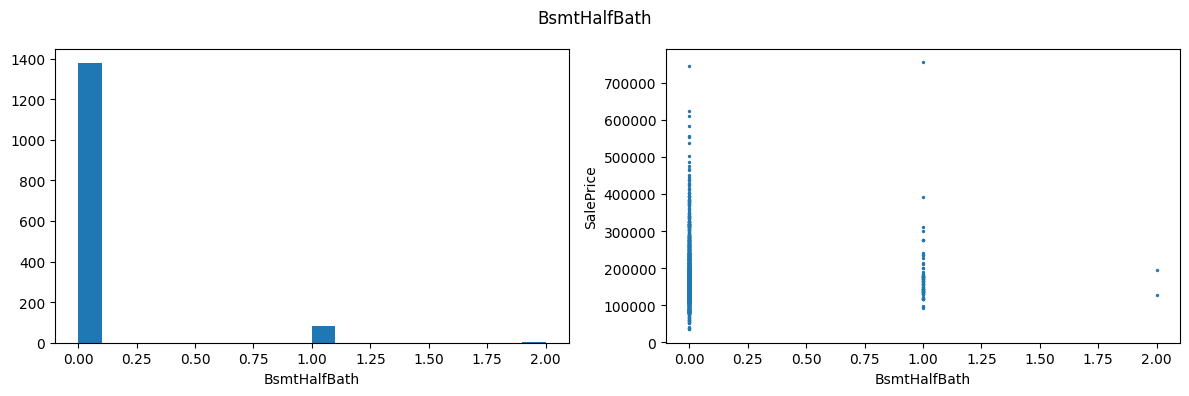

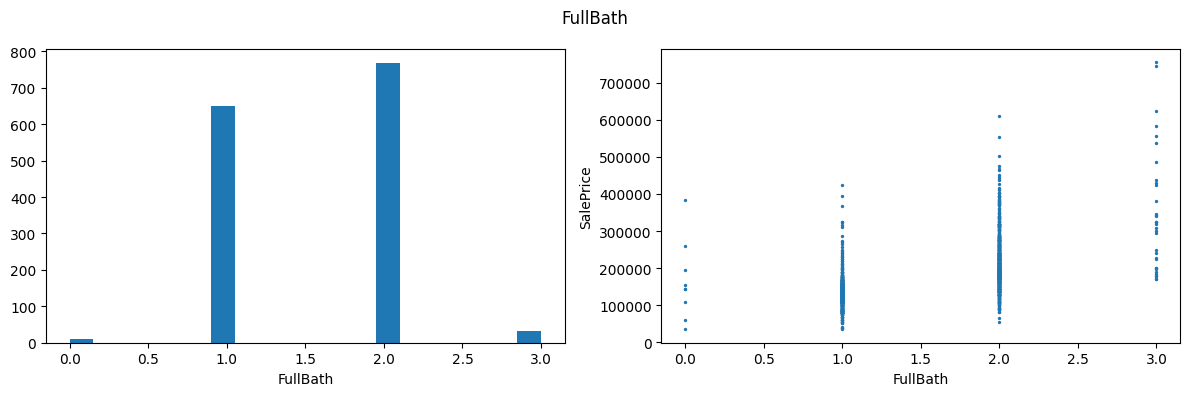

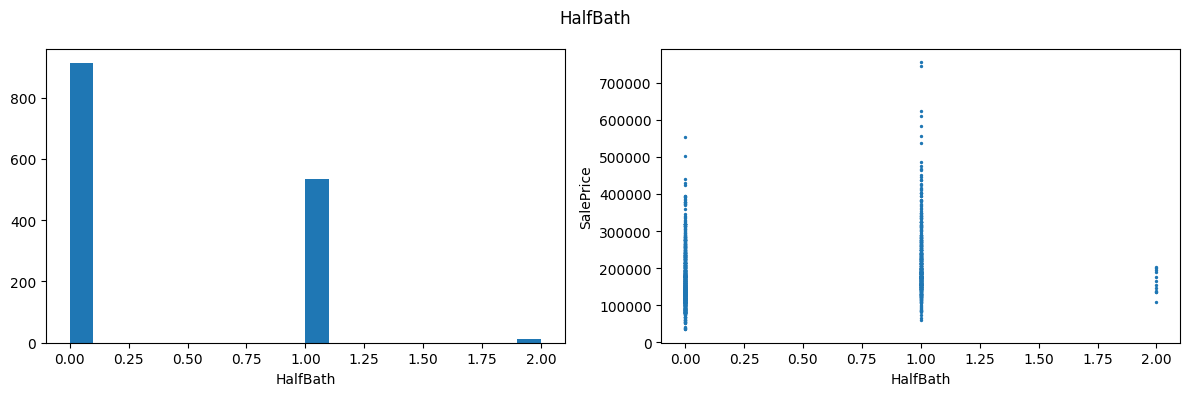

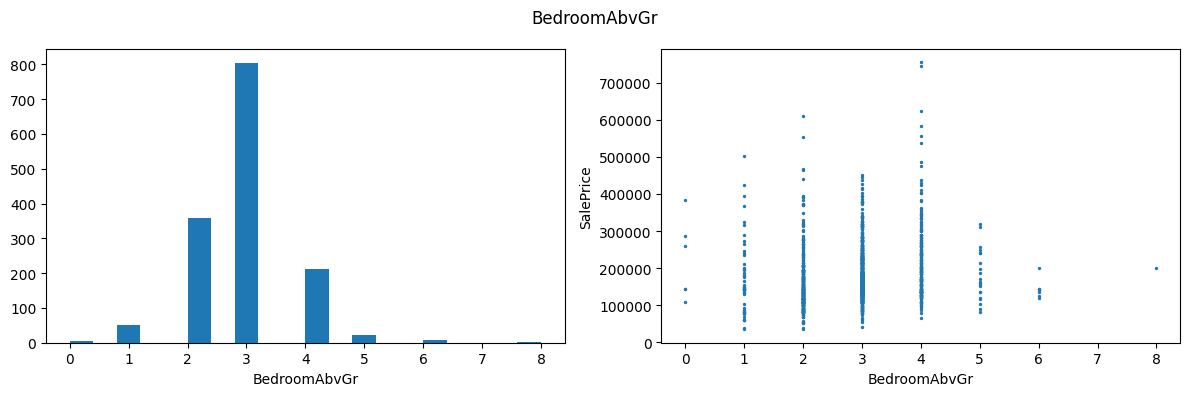

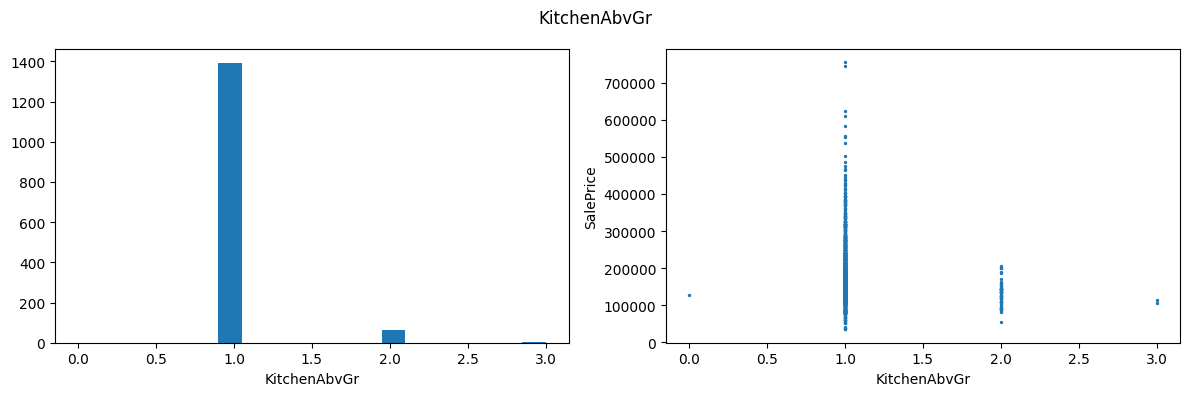

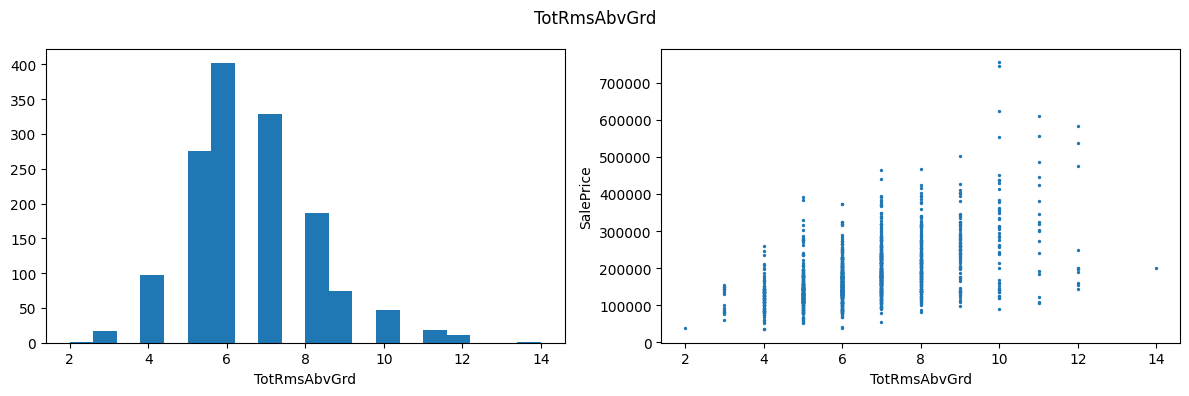

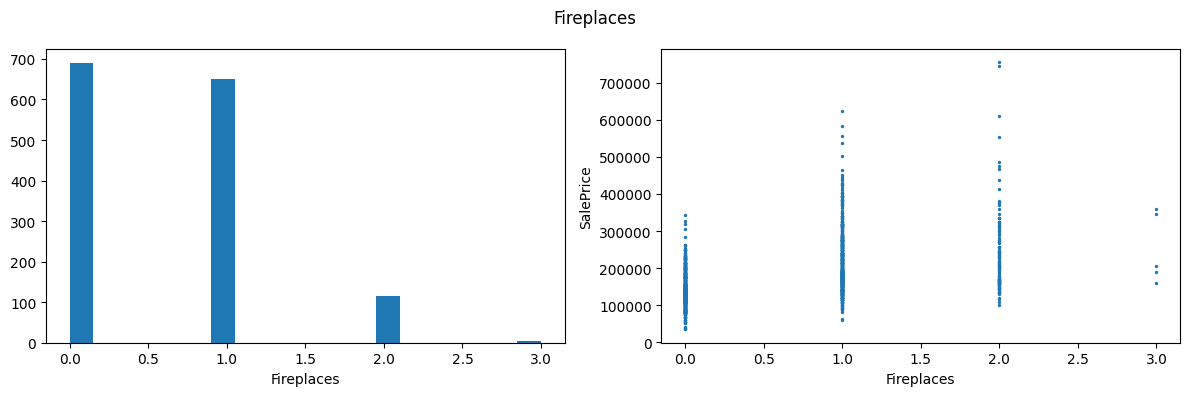

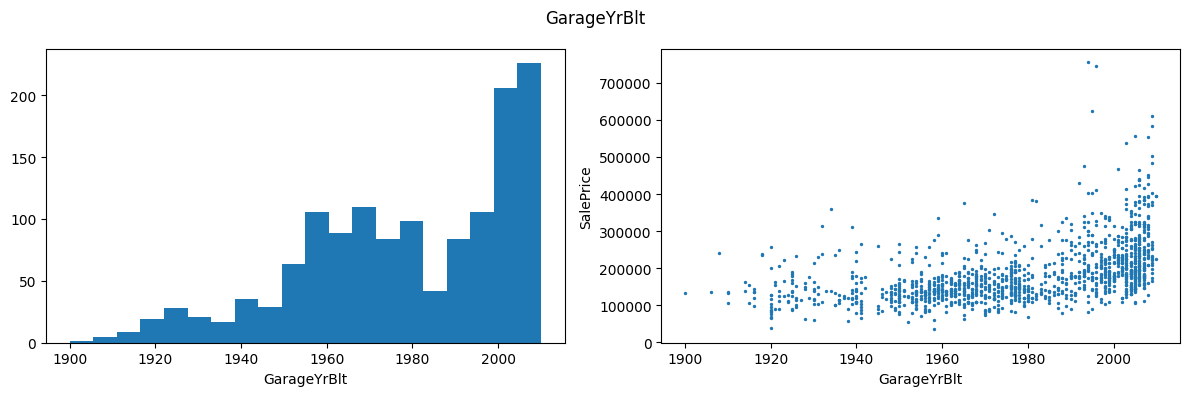

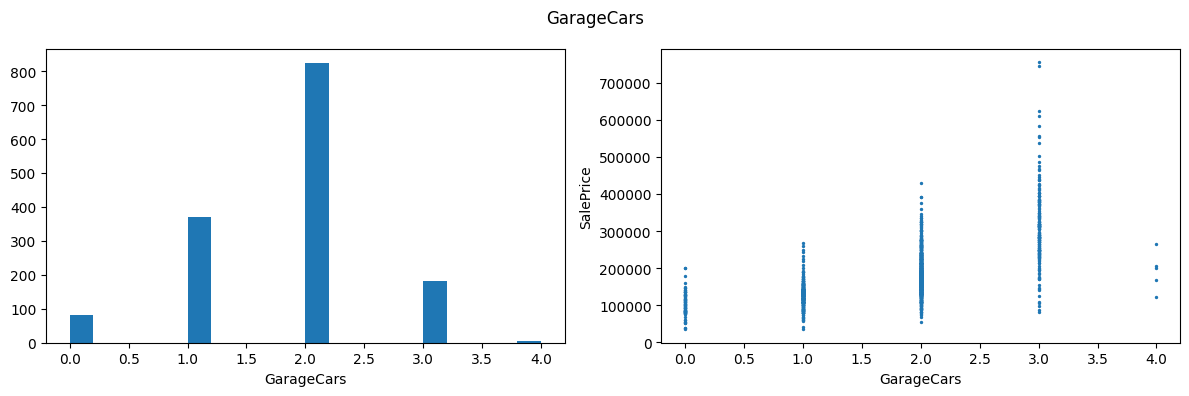

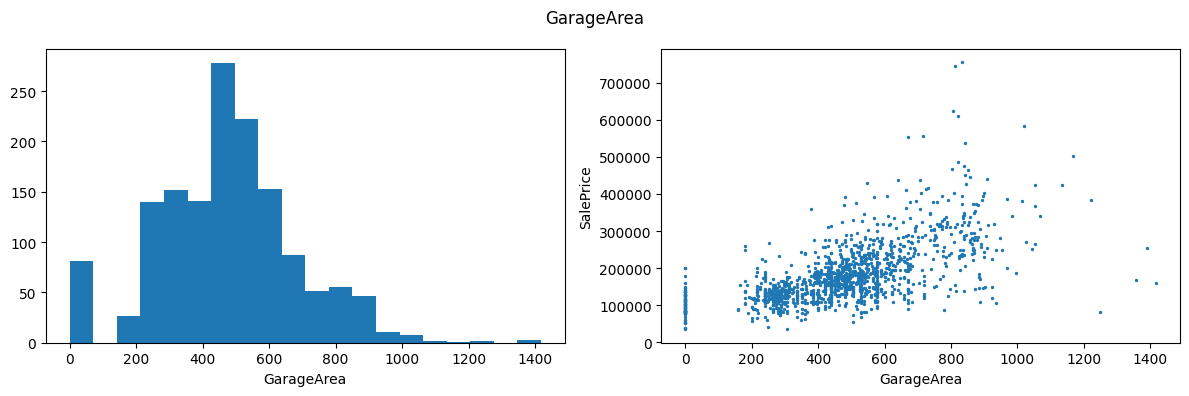

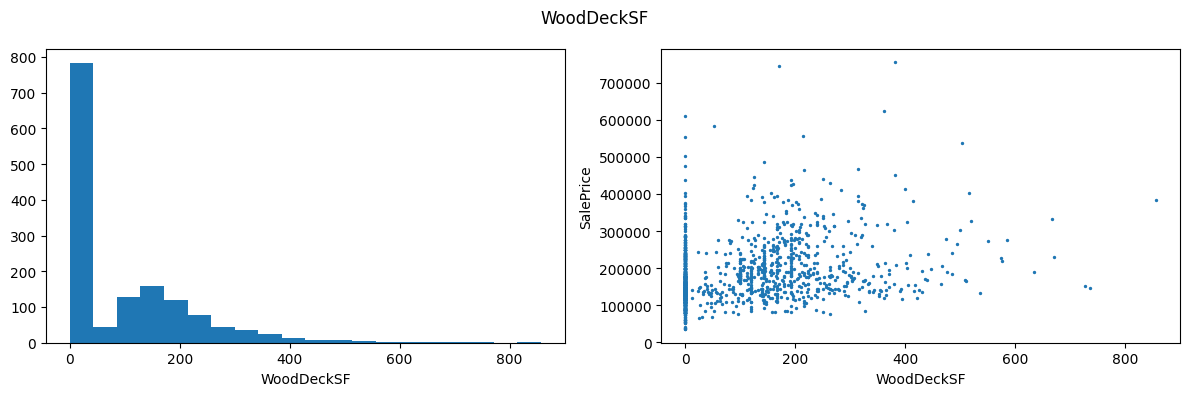

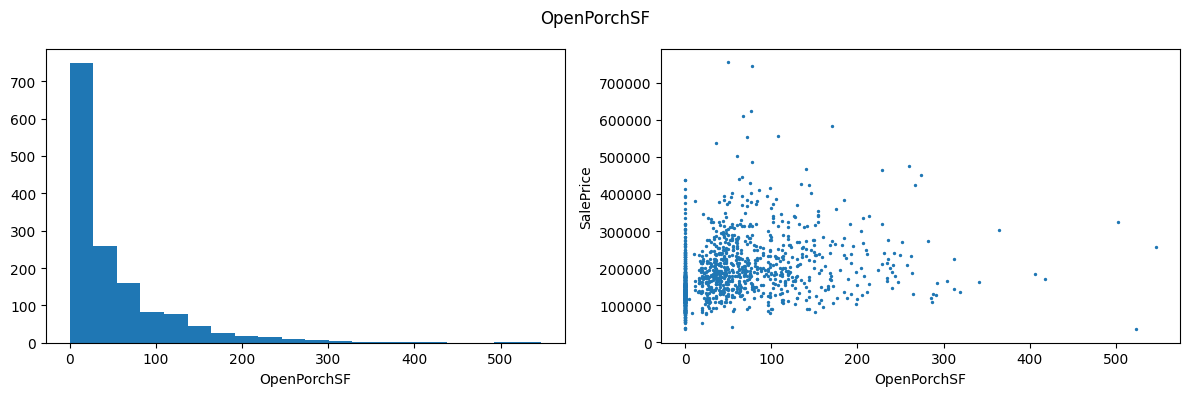

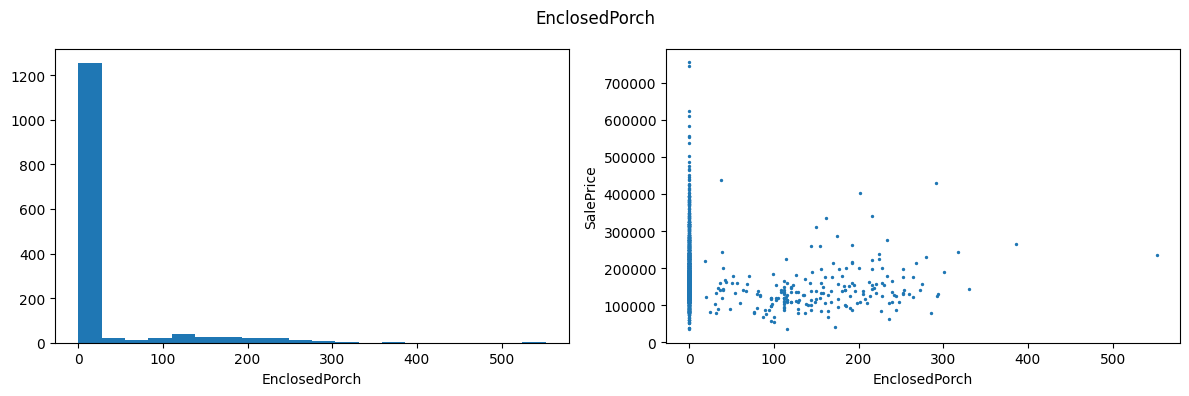

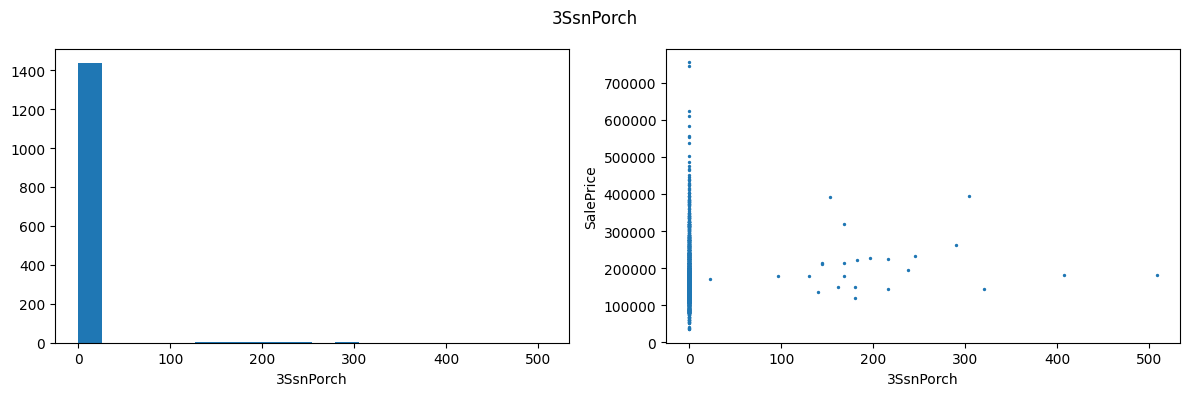

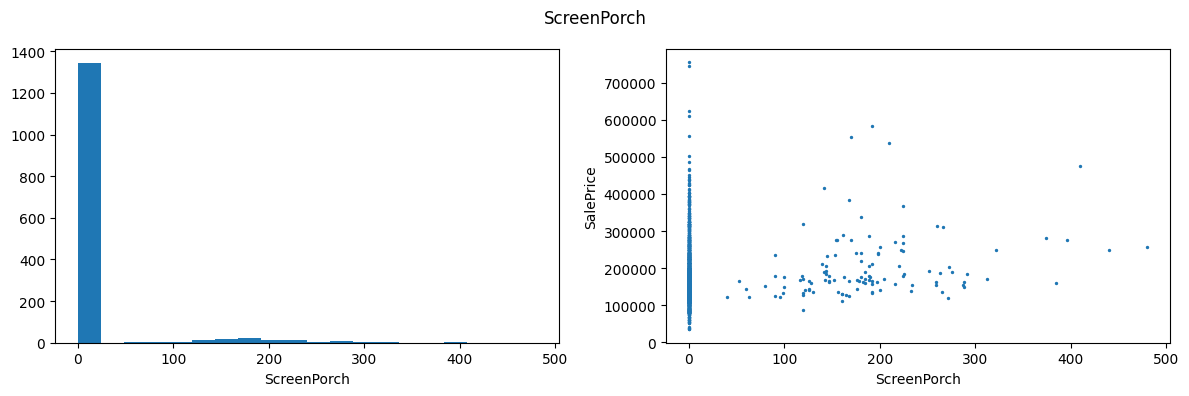

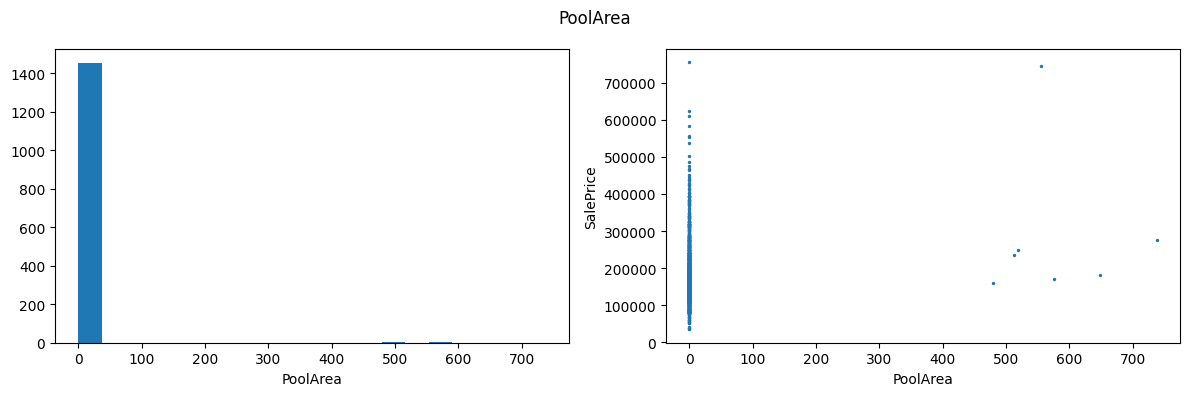

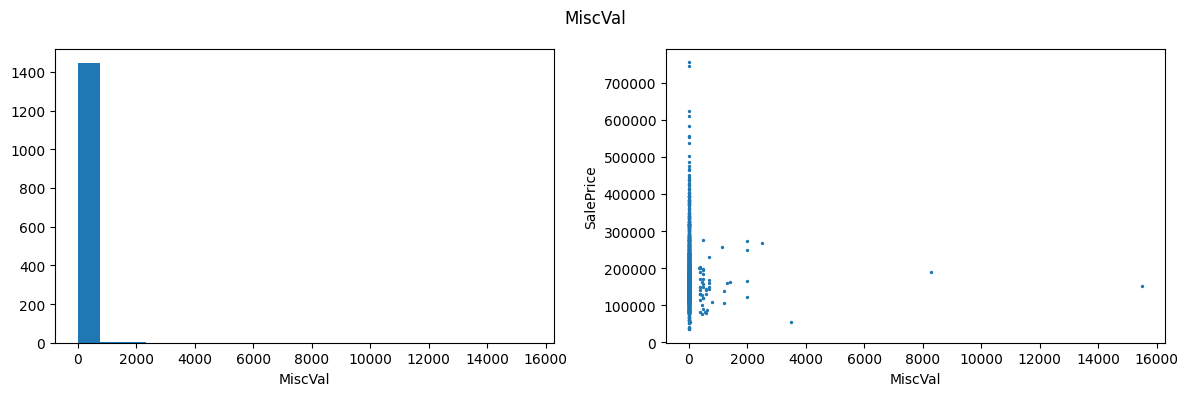

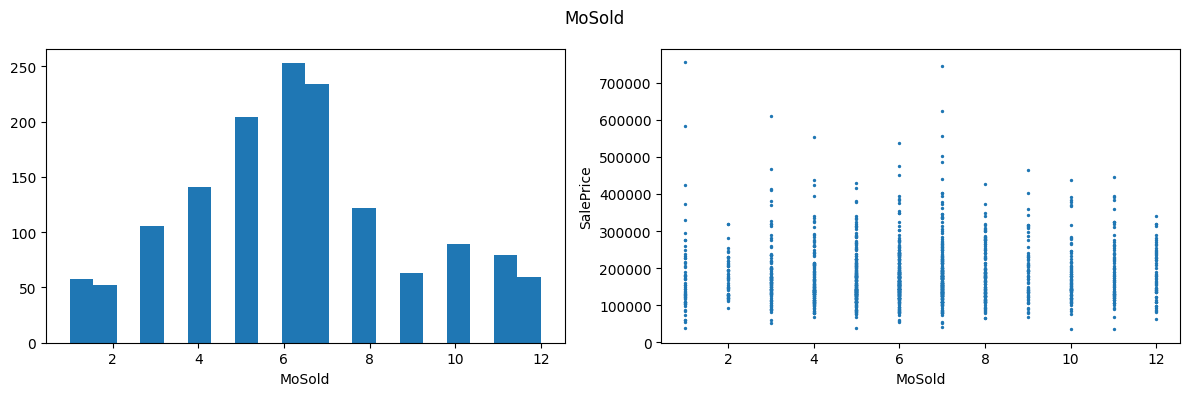

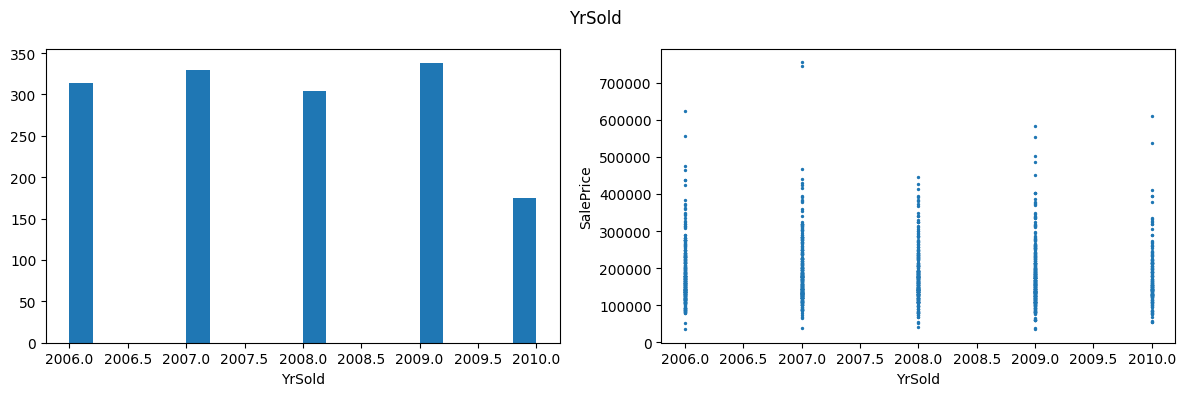

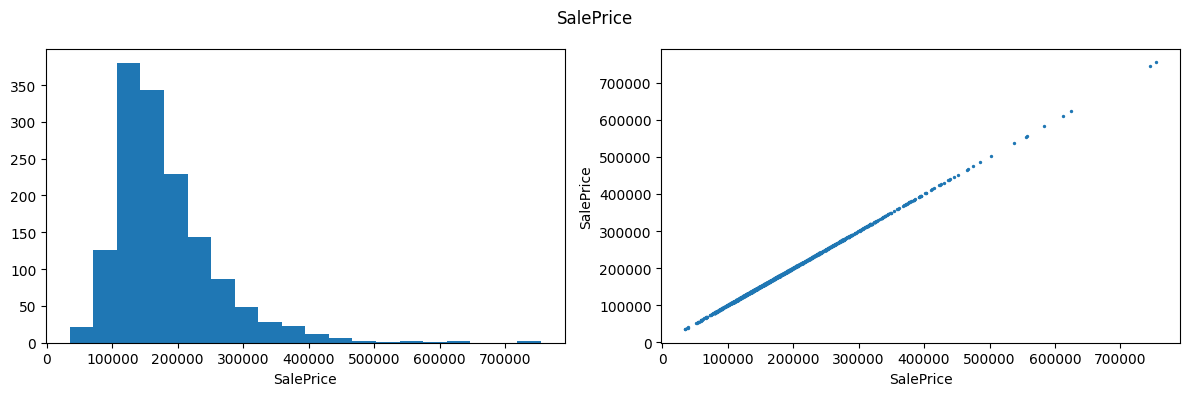

In [76]:
# Interaction variable definition
target = "SalePrice"
y = train[target]

# For each numeric variable...
for col in num_features:

    # Determine data to focus on
    x = train[col]

    # Generate interface for two graphs
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(col)

    # Draw on the left the histogram with the distribution of the variable
    axs[0].hist(x, bins=20)
    axs[0].set_xlabel(col)

    # Draw the scatterplot on the right with the interaction between the variable of interest and the response variable
    axs[1].scatter(x, y, s=2)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target)

    # show visualization
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()

### Exploración de variables categóricas


In [77]:
#split dataset into categorical and numerical
train_df_cat = train.select_dtypes(include='object')
train_df_cat['SalePrice'] = train['SalePrice']
train_df_num = train.select_dtypes(include='number')
train_df_num['SalePrice'] = train['SalePrice']

In [78]:
def ANOVA_Test(df, feature):
    category_groups = df.groupby(feature)['SalePrice'].apply(list)
    return f_oneway(*category_groups)

In [79]:
p_vals = {}
for col in train_df_cat.columns:
    p_vals[col] = ANOVA_Test(train_df_cat, col).statistic
p_vals.pop('SalePrice')
sorted(p_vals.items(),key=lambda item: item[1],reverse=True)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning:

Each of the input arrays is constant;the F statistic is not defined or infinite



[('ExterQual', 443.3348314150462),
 ('KitchenQual', 407.80635155838854),
 ('BsmtQual', 392.9135064723092),
 ('GarageFinish', 250.96246721359347),
 ('MasVnrType', 111.67238008941875),
 ('Foundation', 100.25385058740888),
 ('CentralAir', 98.30534356615253),
 ('HeatingQC', 88.39446198869796),
 ('Neighborhood', 71.78486512058278),
 ('GarageType', 71.5221230789301),
 ('BsmtExposure', 70.88798364989222),
 ('BsmtFinType1', 67.60217483627738),
 ('SaleCondition', 45.57842830969572),
 ('MSZoning', 43.84028167245718),
 ('PavedDrive', 42.02417941762533),
 ('LotShape', 40.132851662262944),
 ('Alley', 35.56206043131903),
 ('SaleType', 28.863054116984085),
 ('FireplaceQu', 24.398929420064125),
 ('Electrical', 23.06767302405713),
 ('HouseStyle', 19.595000995981213),
 ('Exterior1st', 18.61174286624578),
 ('RoofStyle', 17.80549722914421),
 ('Exterior2nd', 17.500839571369834),
 ('BsmtCond', 14.030600121067247),
 ('BldgType', 13.01107716962085),
 ('LandContour', 12.850188333283924),
 ('GarageQual', 9.5703

In [80]:
# Identification of categoric columns
cat_features = train.columns[train.dtypes == "object"]
print(cat_features)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


<ipython-input-81-0fae326af78d>:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



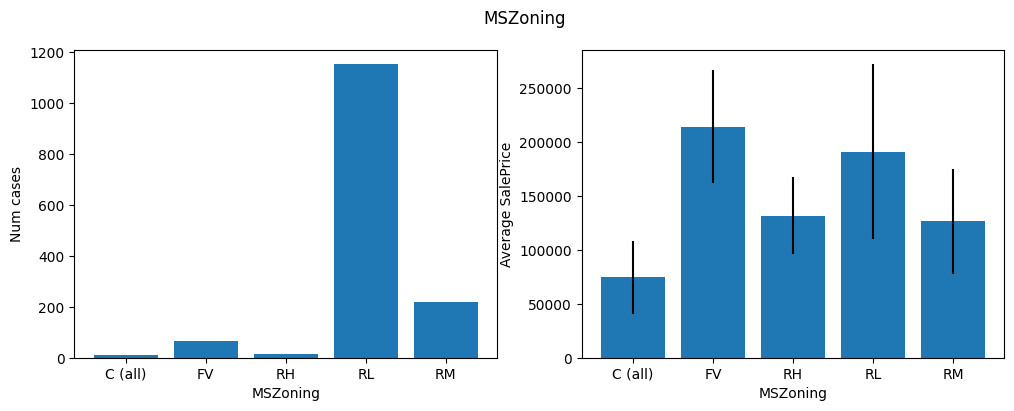

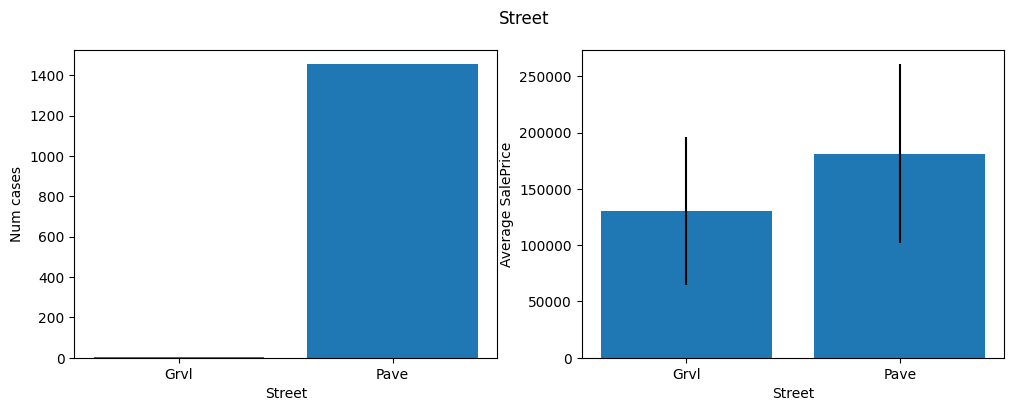

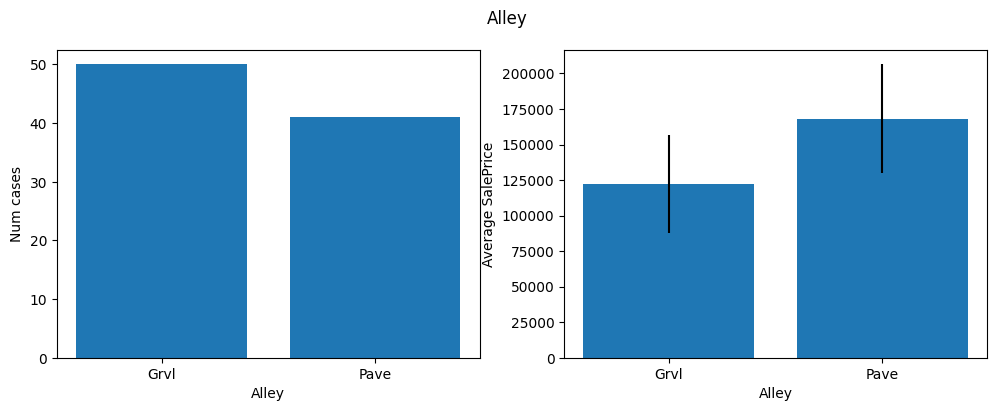

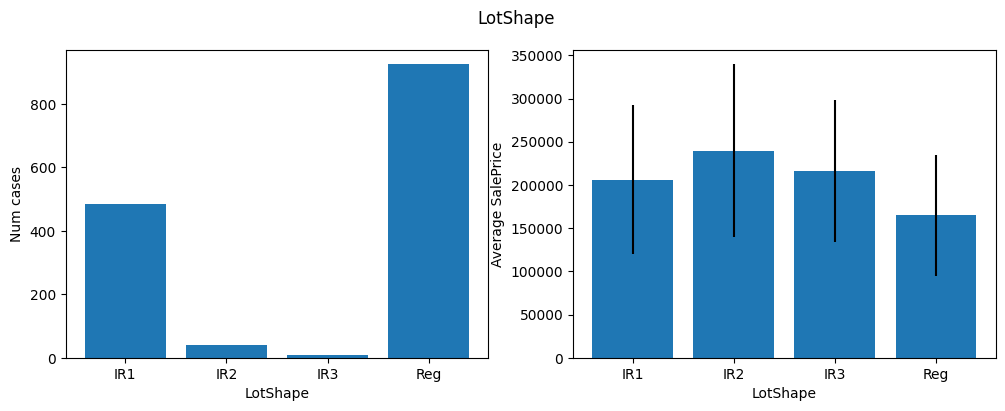

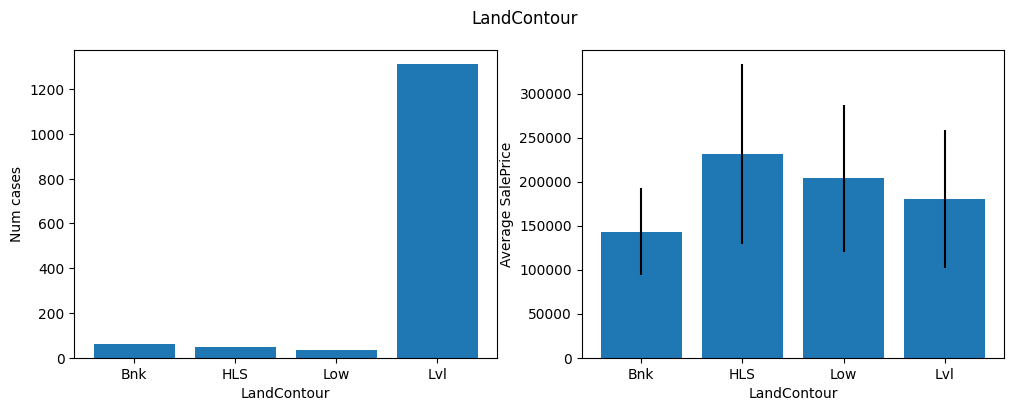

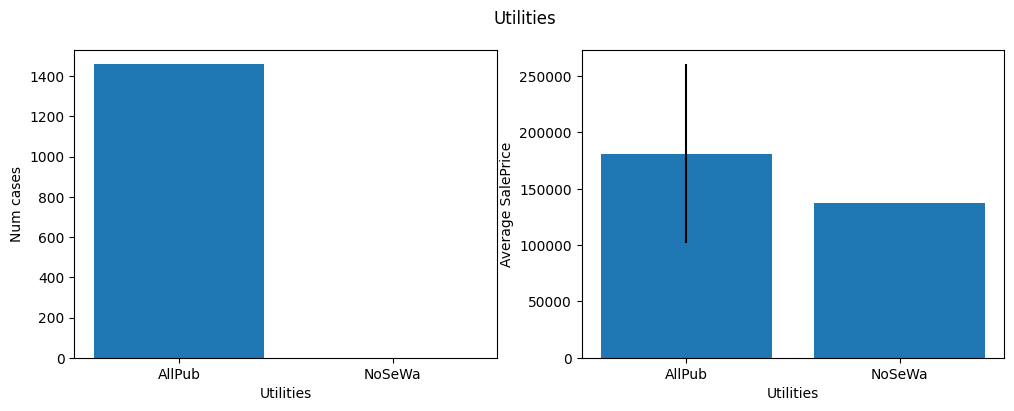

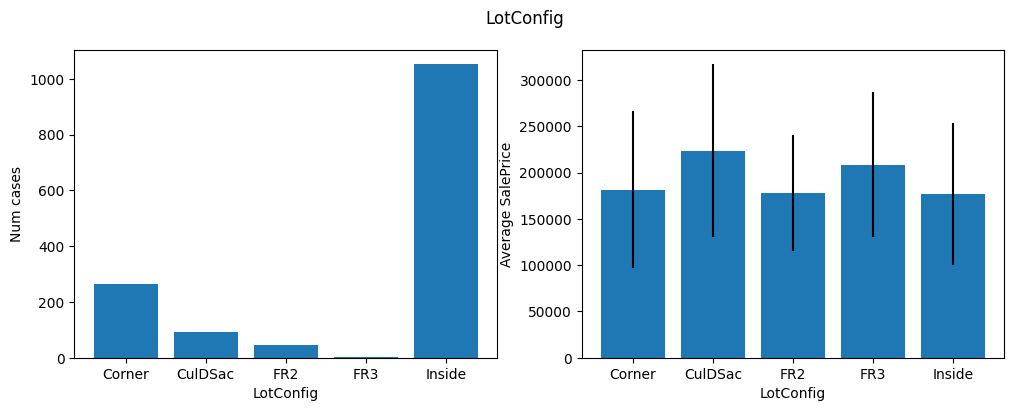

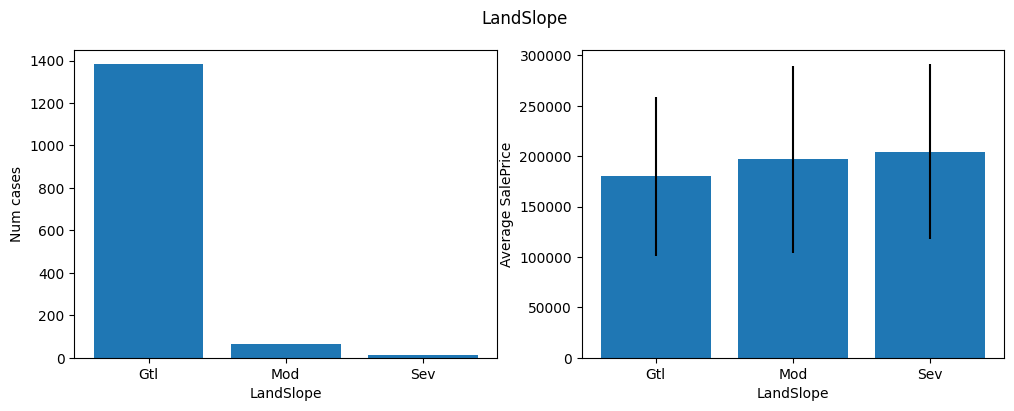

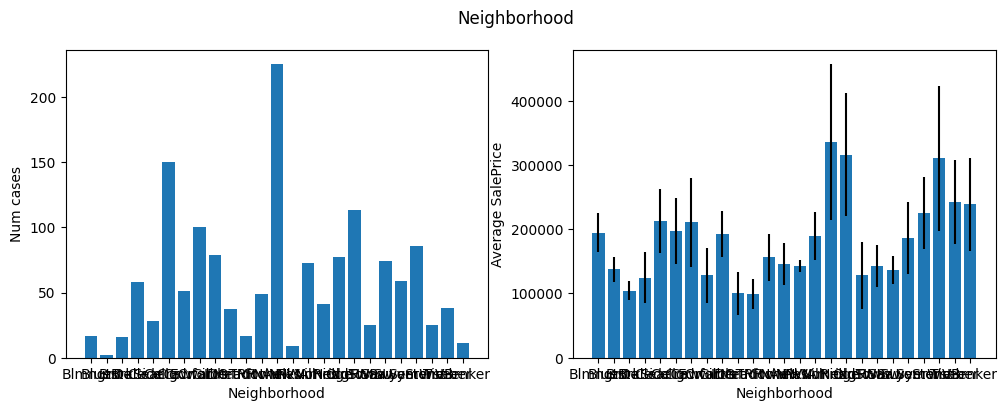

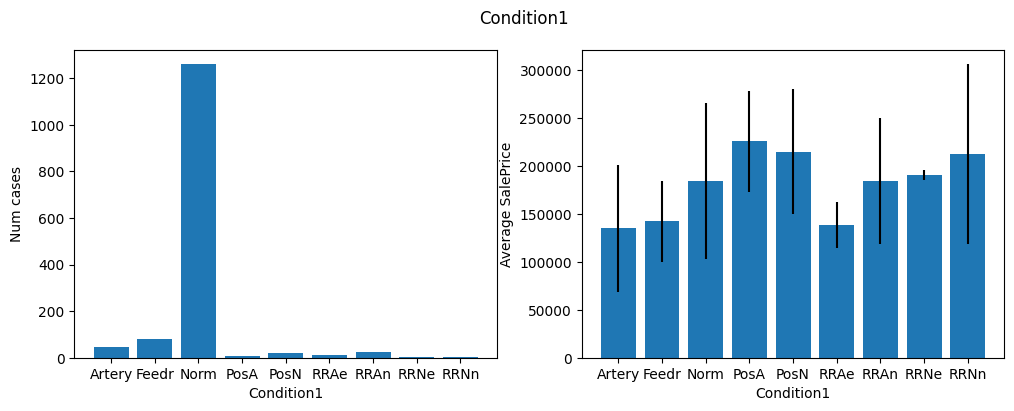

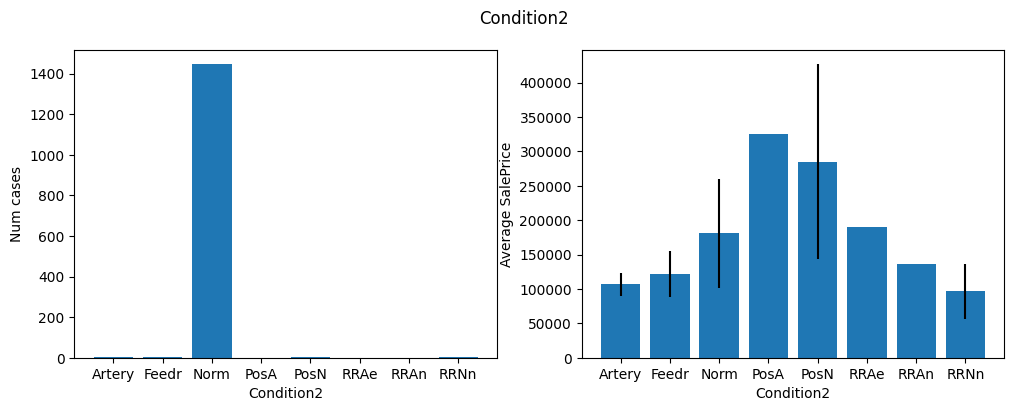

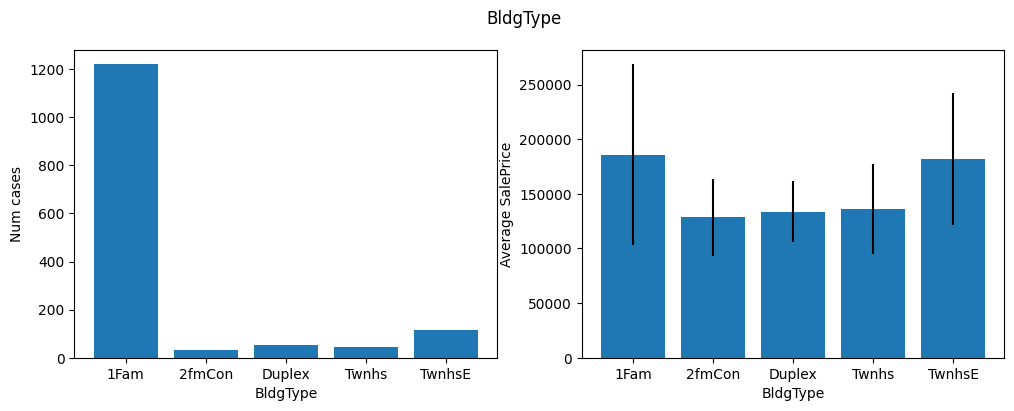

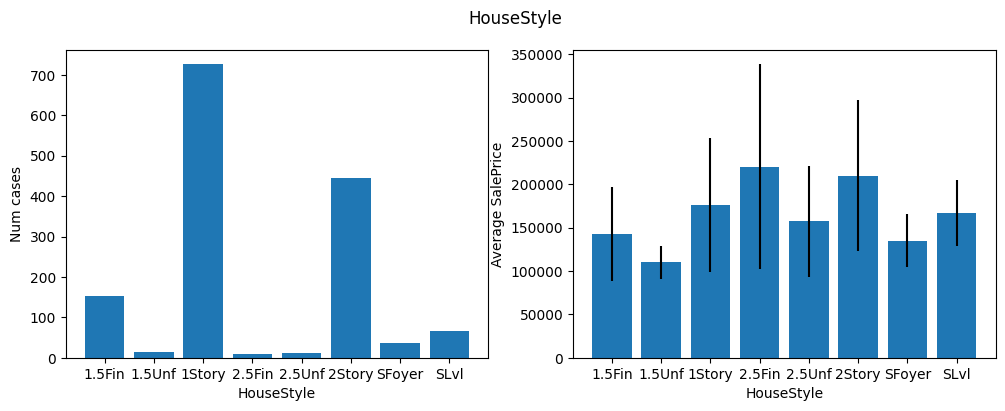

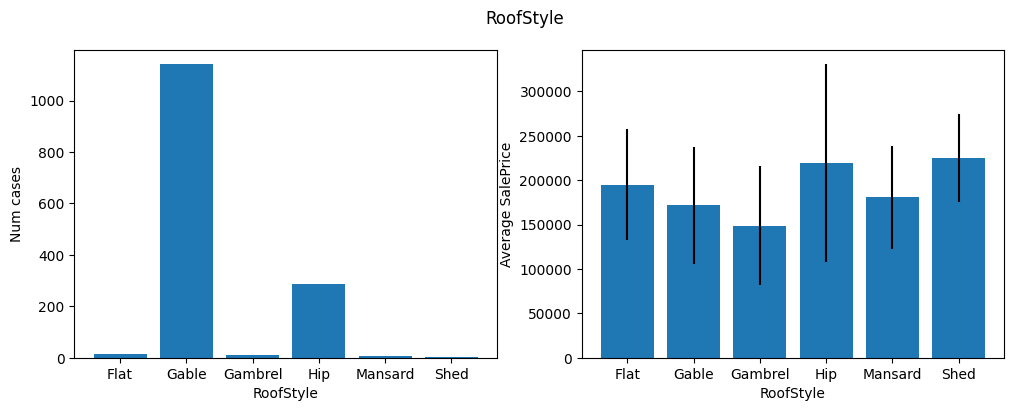

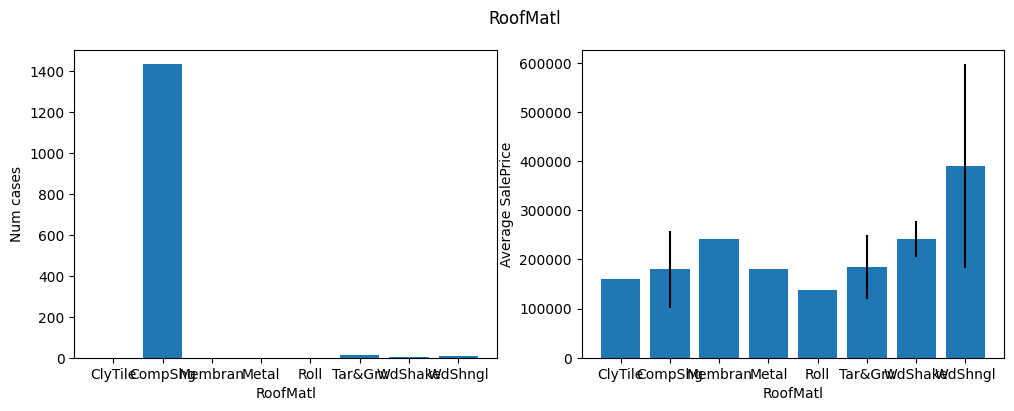

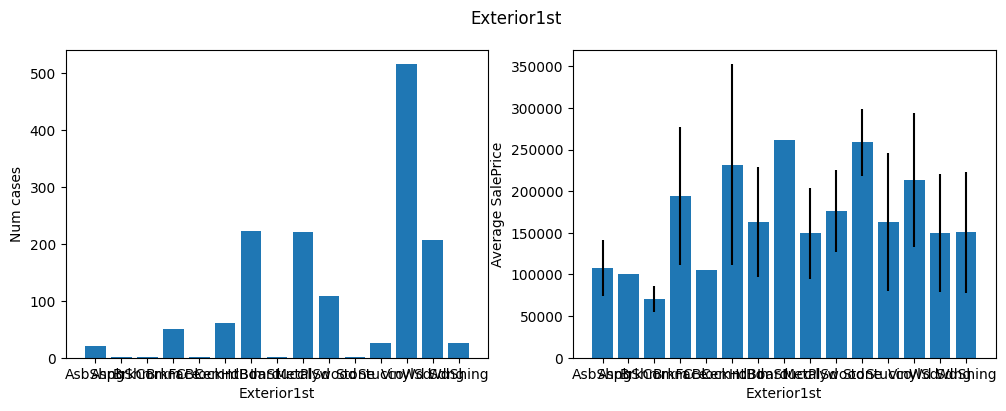

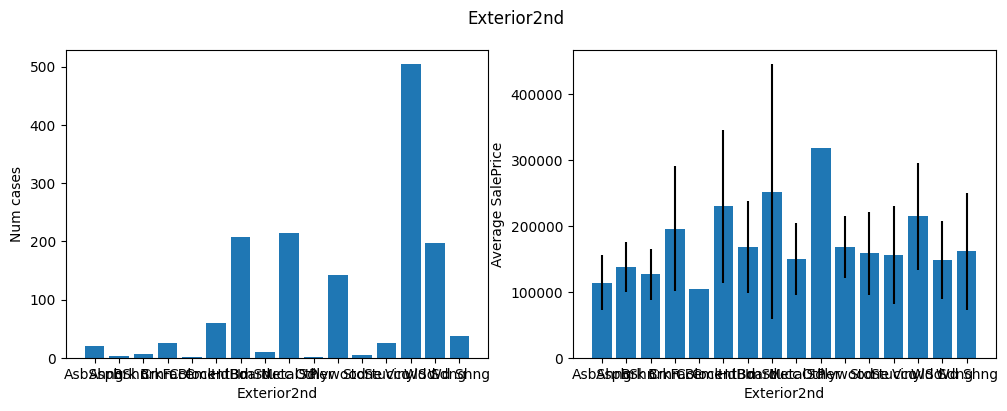

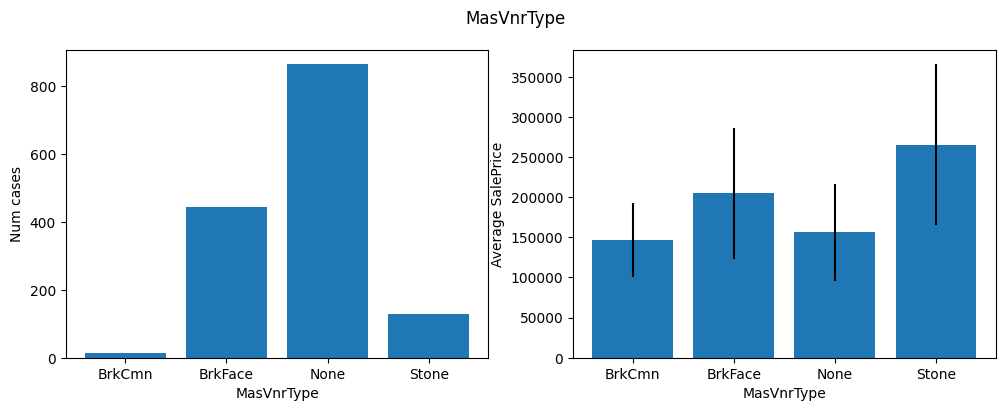

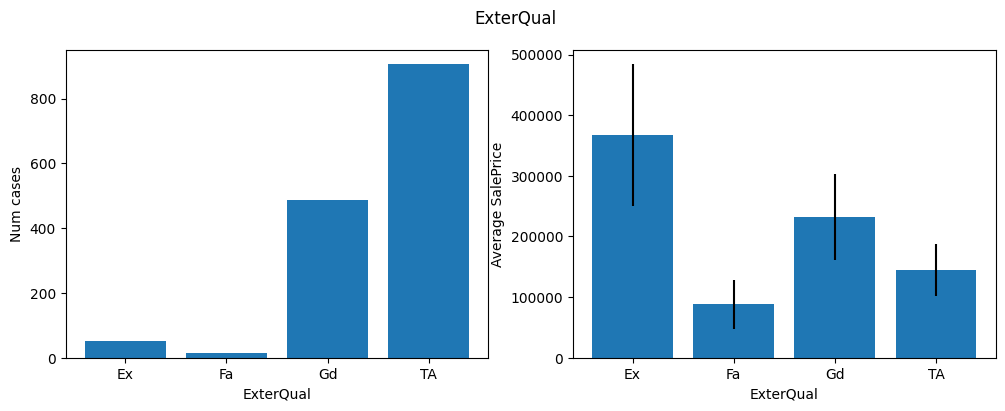

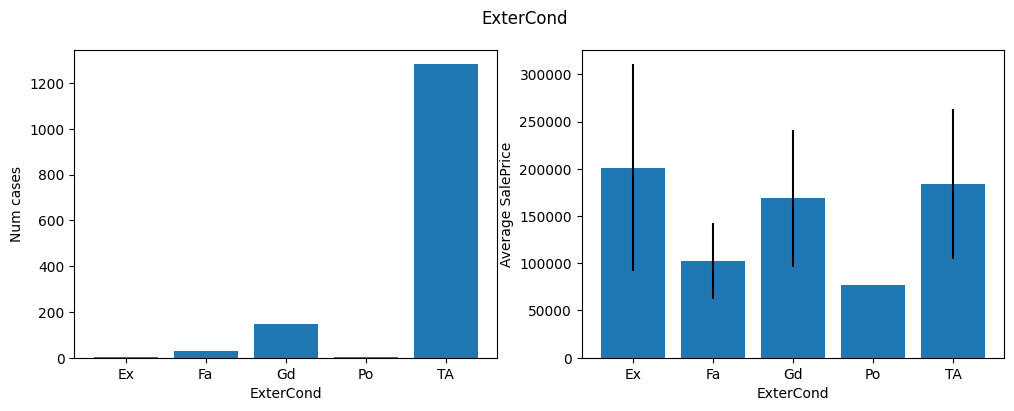

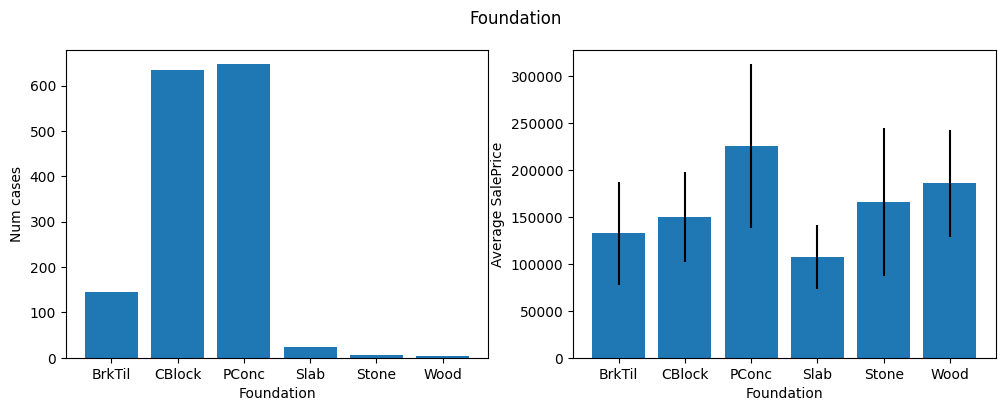

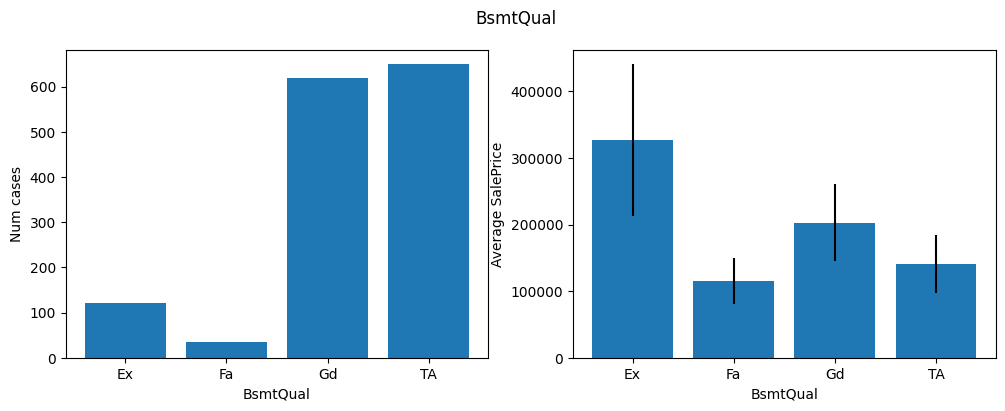

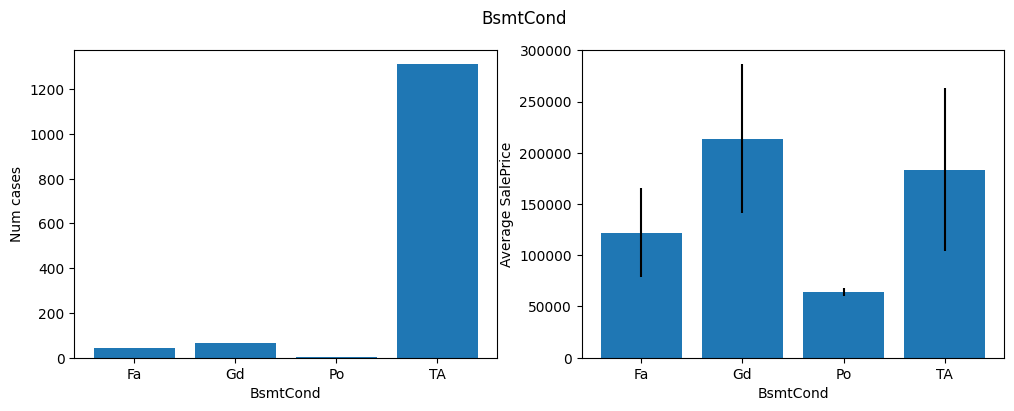

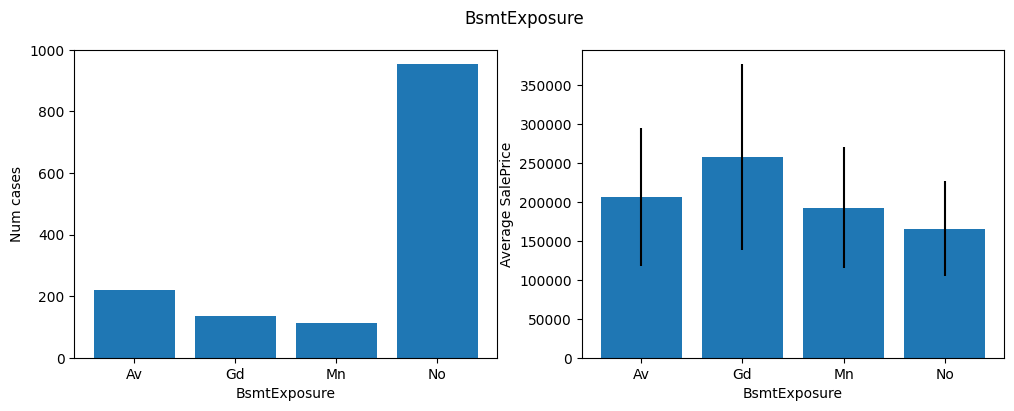

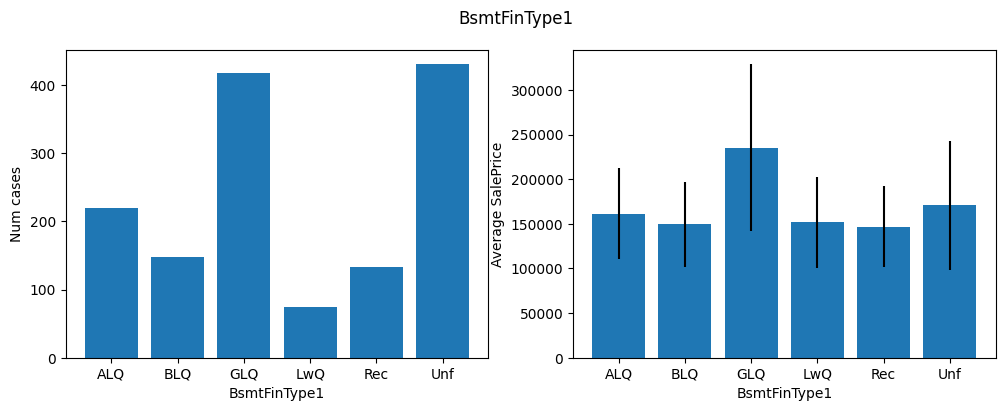

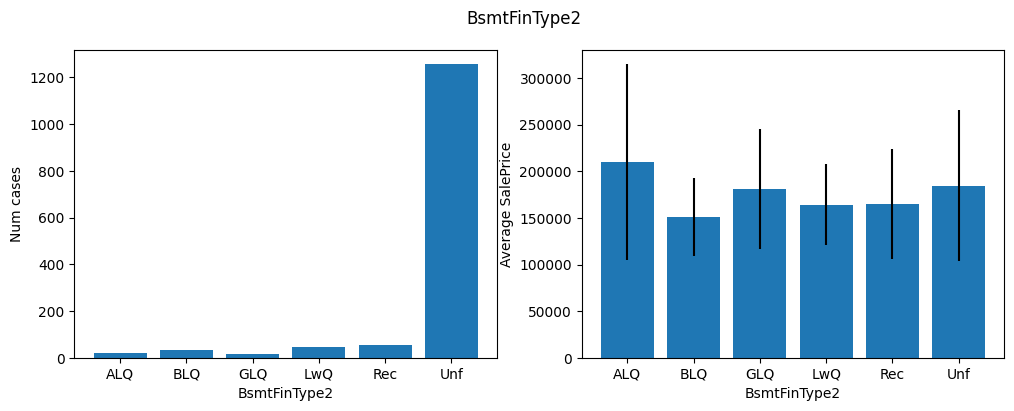

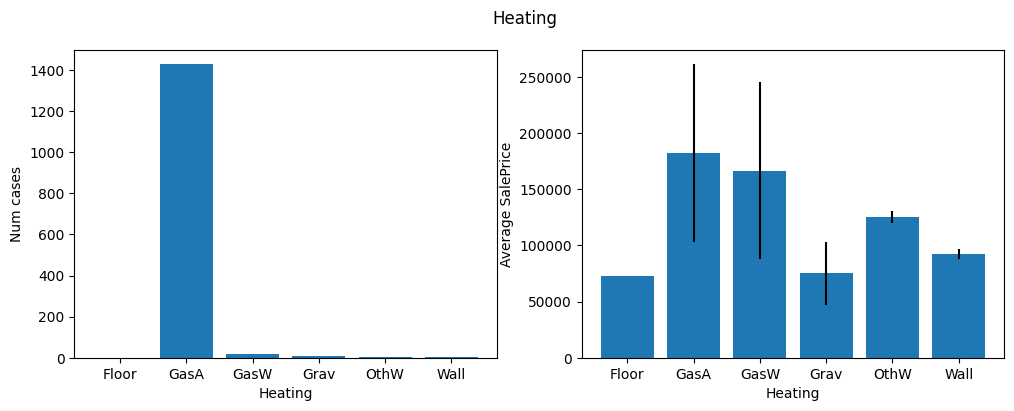

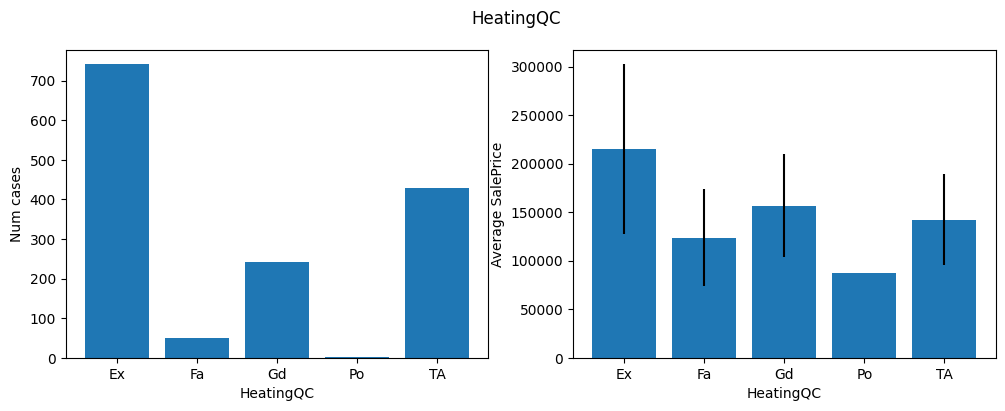

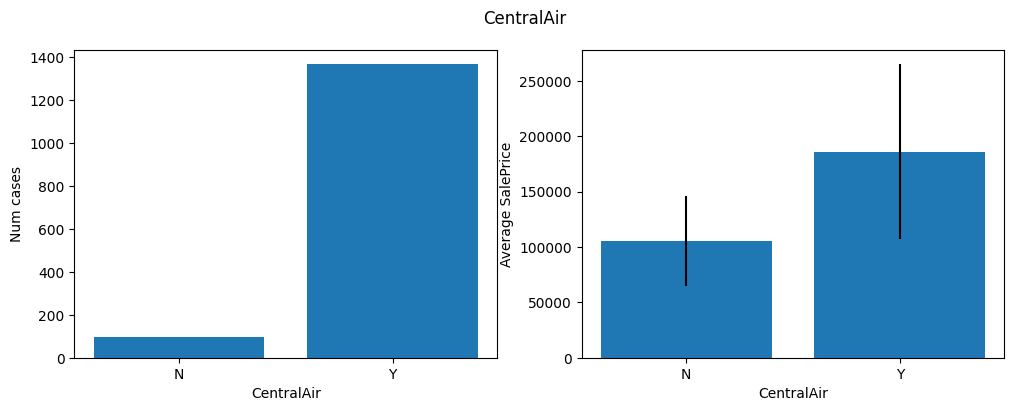

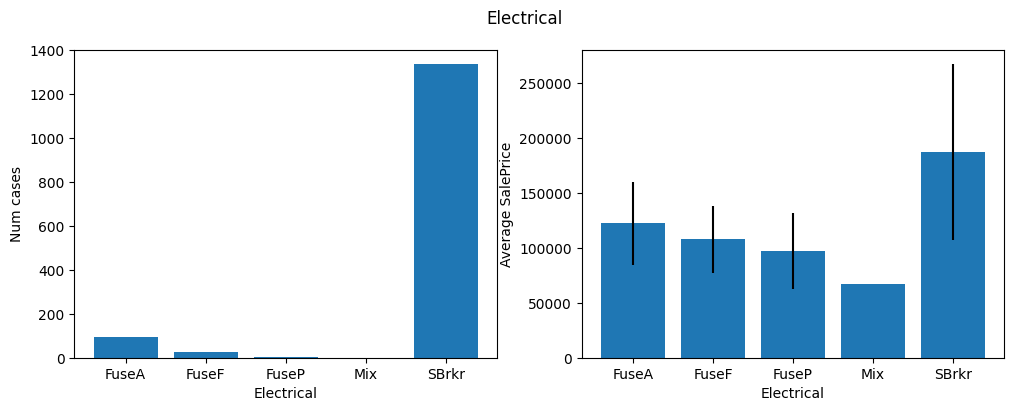

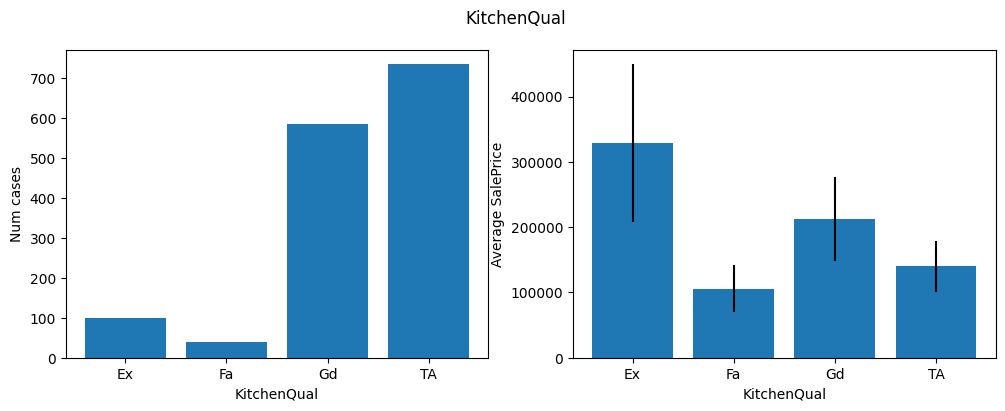

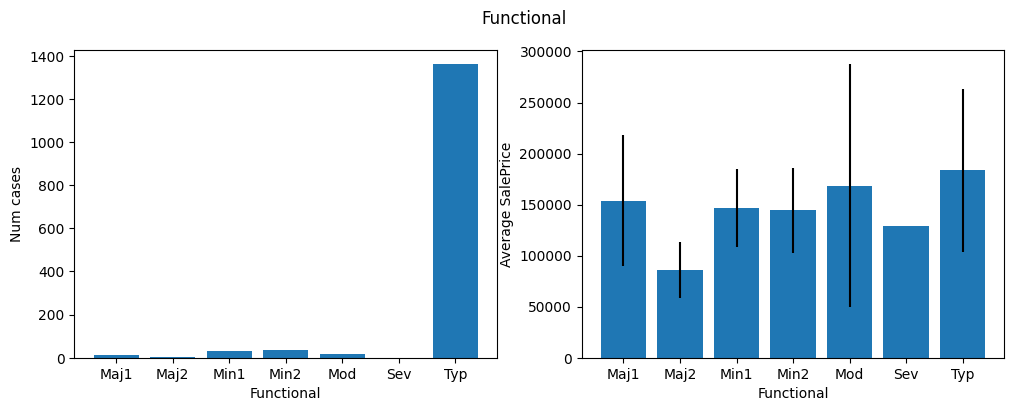

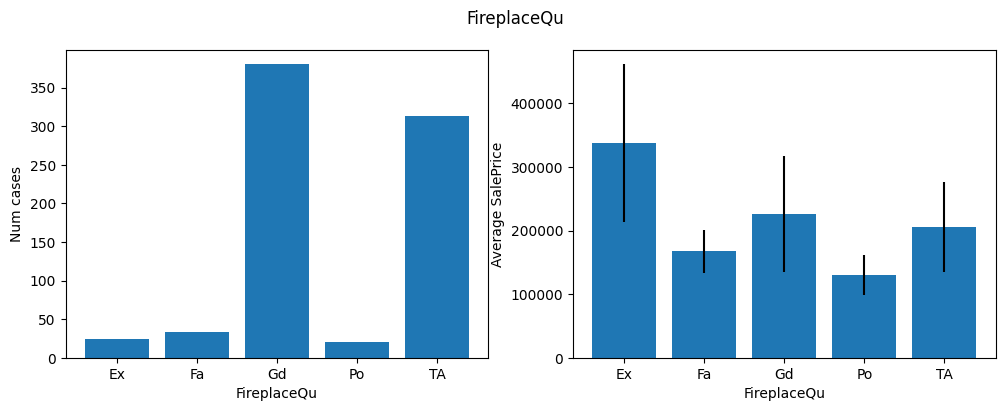

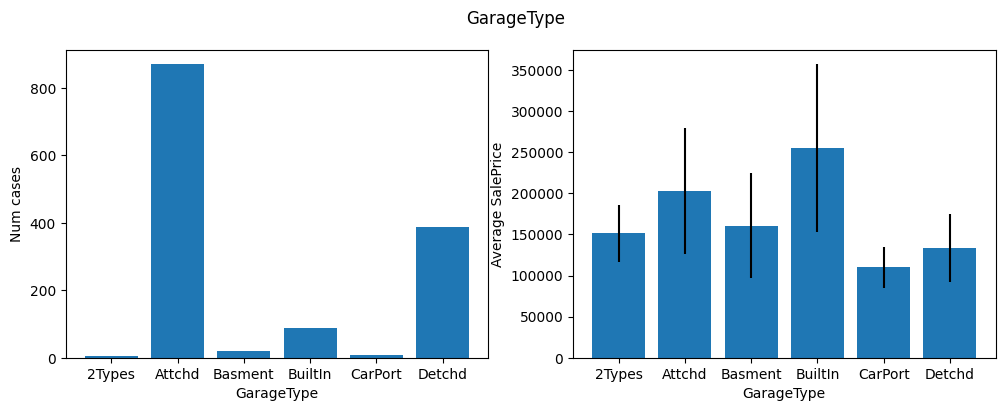

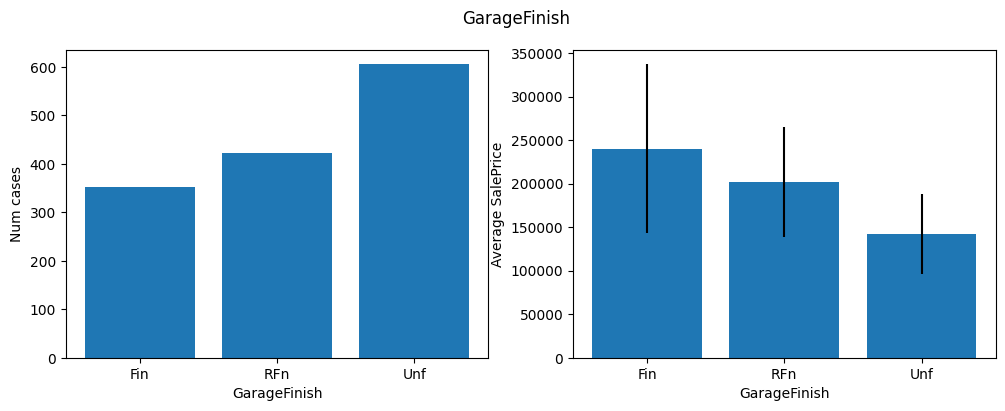

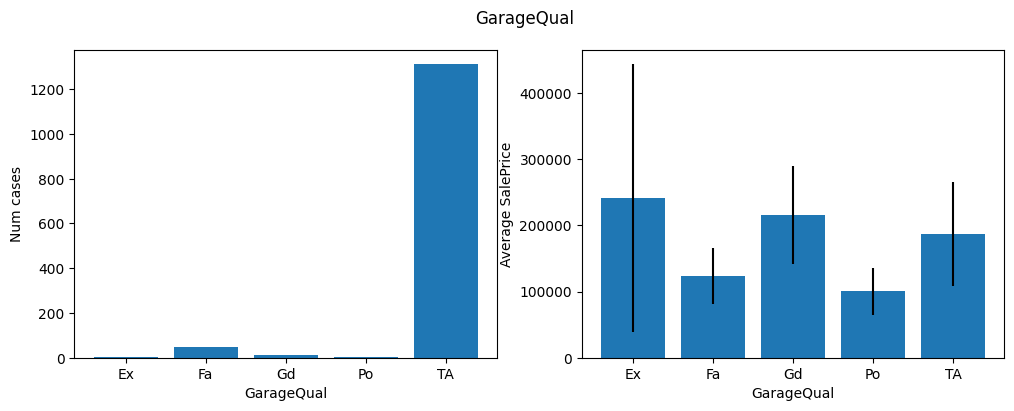

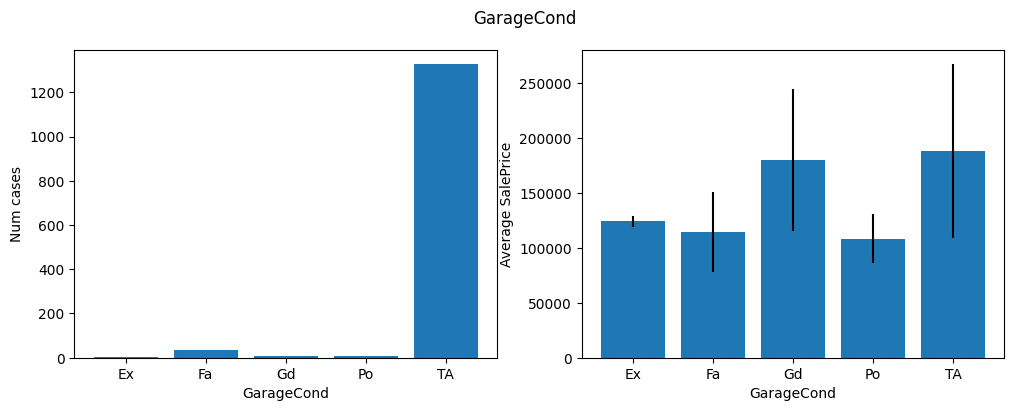

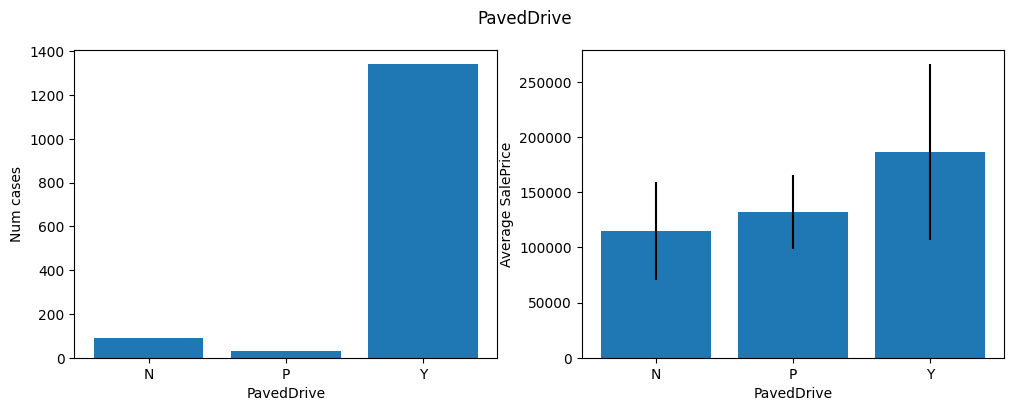

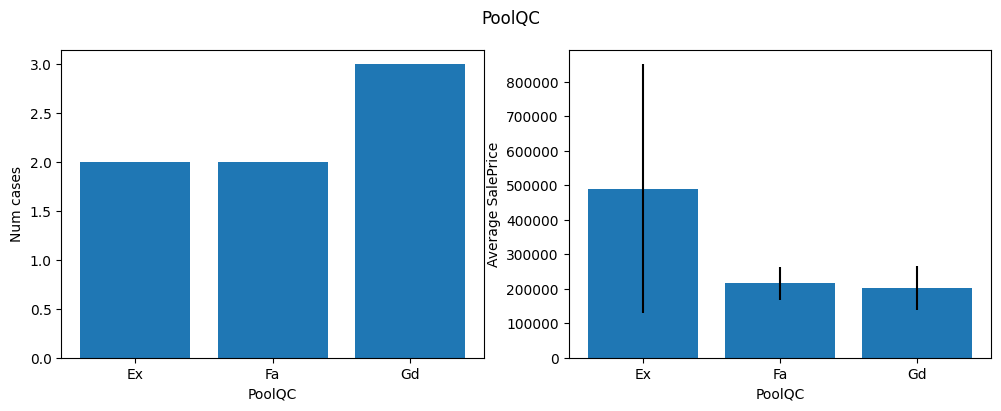

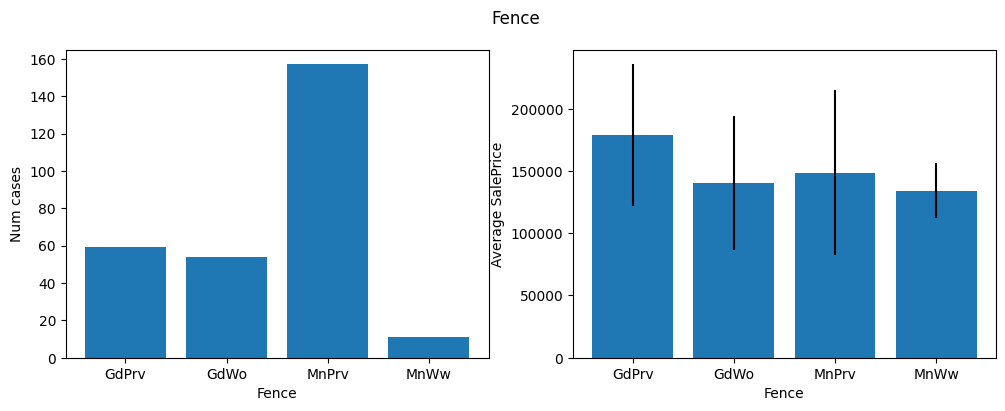

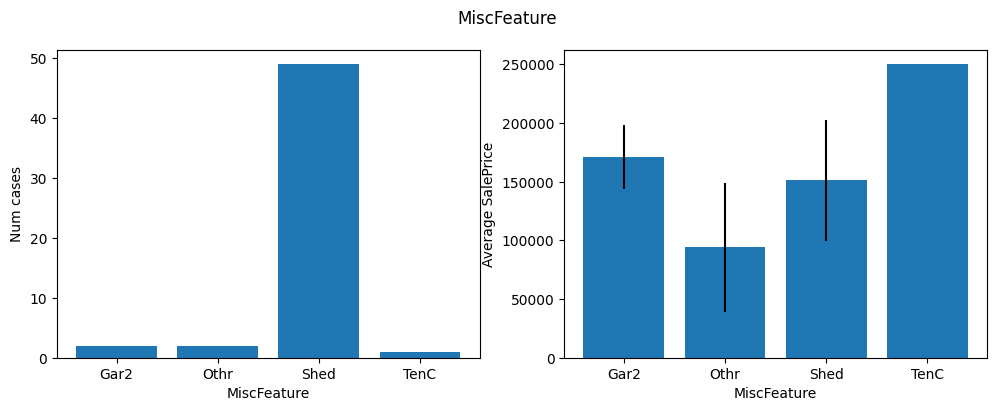

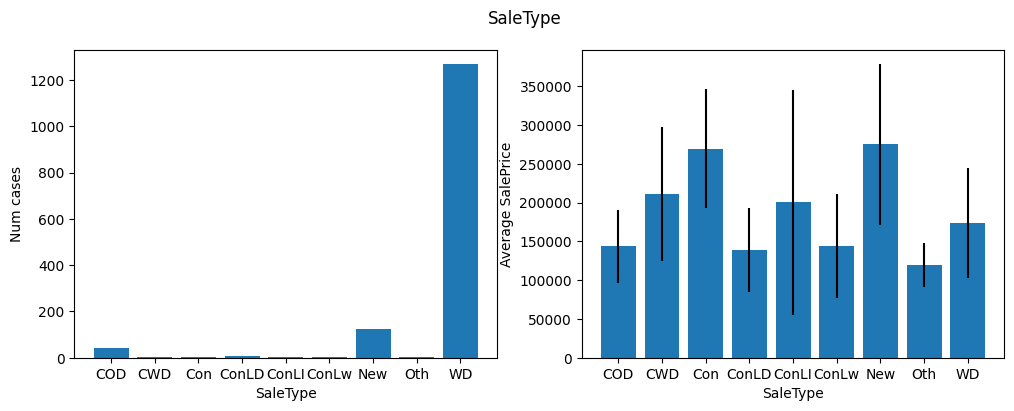

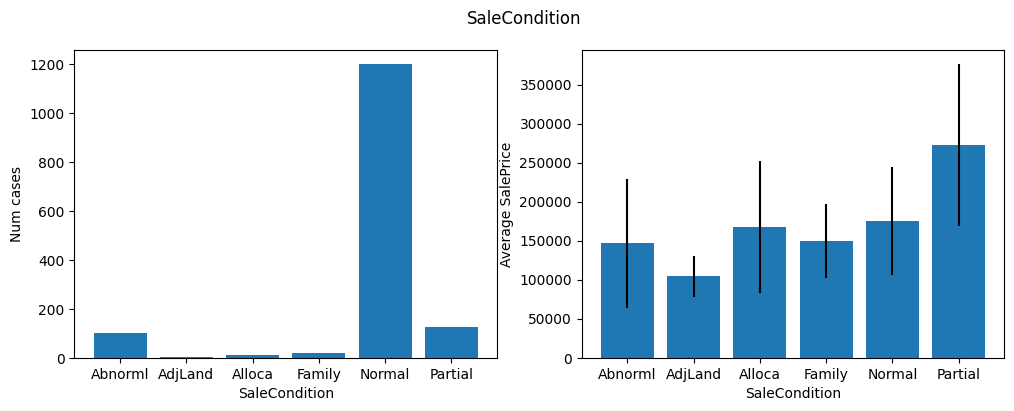

In [81]:
# Interaction variable definition
target = "SalePrice"

# Iterate through each categorical variable...
for col in cat_features:

    # Determine data to focus on
    df_counts = train.groupby(col)['Id'].count()
    df_mean_target = train.groupby(col)['SalePrice'].mean()
    df_std_target = train.groupby(col)['SalePrice'].std()

    # Generate interface for two graphs
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(col)

    # Draw the bar chart with counts on the left
    x = df_counts.index.tolist()
    h = df_counts.values.tolist()
    axs[0].bar(x, h)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Num cases')

    # Draw on the right the bar chart with interaction between categories and average response
    x = df_mean_target.index.tolist()
    h = df_mean_target.values.tolist()
    err = df_std_target.values.tolist()
    axs[1].bar(x, h, yerr=err)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(f"Average {target}")

In [82]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=train['MasVnrType'], y=train['SalePrice'], mode='markers', name='SalePrice vs MasVnrType'),
    row=1, col=1
)

In [83]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=train['Foundation'], y=train['SalePrice'], mode='markers', name='SalePrice vs Foundation'),
    row=1, col=1
)

# Transformación de los datos

In [84]:
var = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','ExterQual','KitchenQual','BsmtQual','GarageFinish','MasVnrType','Foundation','CentralAir','HeatingQC']

## Variables numéricas


In [85]:
num_var = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','MasVnrArea','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF','2ndFlrSF']
num_var1 = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','MasVnrArea','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF','2ndFlrSF']

#A partir de aquí la correlación de las variables numéricas restantes es demasiado parecida a la de la variable ID (no relacionada con el precio de venta) como para tenerlas en cuenta

# Llenar valores nulos
train["GarageCars"] = train["GarageCars"].fillna(0)
test["GarageCars"] = test["GarageCars"].fillna(0)
train["GarageArea"] = train["GarageArea"].fillna(0)
test["GarageArea"] = test["GarageArea"].fillna(0)
train["TotalBsmtSF"] = train["TotalBsmtSF"].fillna(0)
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(0)
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
train["BsmtFinSF1"] = train["BsmtFinSF1"].fillna(0)
test["BsmtFinSF1"] = test["BsmtFinSF1"].fillna(0)

train["LotFrontage"] = train["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
test["LotFrontage"] = test["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

train["GarageYrBlt"] = train["GarageYrBlt"].transform(lambda x: x.fillna(train["YearBuilt"]))
test["GarageYrBlt"] = test["GarageYrBlt"].transform(lambda x: x.fillna(test["YearBuilt"]))

# Eliminar Outliers
#train.drop(train.loc[train['TotalBsmtSF']==6110].index, inplace=True)  #hay que borrar el dato con indice 1299

# Corregir Valores Erroneos
test.loc[(test["GarageYrBlt"]==2207), "GarageYrBlt"] = 2007

#transformacion logaritmica

for vari in num_var:
  train.loc[(train[vari]==0), vari] = 1
  test.loc[(test[vari]==0), vari] = 1
  train[vari] = np.log(train[vari])
  test[vari] = np.log(test[vari])

In [86]:
test.loc[(test["GarageYrBlt"]==2207), "GarageYrBlt"]

Series([], Name: GarageYrBlt, dtype: float64)

In [87]:
train.loc[(train[vari]==0), vari]

1       0.0
6       0.0
9       0.0
10      0.0
12      0.0
       ... 
1453    0.0
1454    0.0
1456    0.0
1458    0.0
1459    0.0
Name: 2ndFlrSF, Length: 829, dtype: float64

In [88]:
fig = px.histogram(train, x="GarageArea")
fig.show()

In [89]:
fig = px.histogram(train, np.log(train['TotalBsmtSF']))
fig.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [90]:
print(train.shape)
print(test.shape)
valores_nulos = train.isnull().sum()
valores_nulos.sort_values(ascending = False)

(1460, 81)
(1459, 80)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
MasVnrArea        0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

## Variables categóricas

In [91]:
# Llenar valores nulos
train["BsmtQual"] = train["BsmtQual"].fillna('NA')
test["BsmtQual"] = test["BsmtQual"].fillna('NA')

train["GarageFinish"] = train["GarageFinish"].fillna('No_Garage')
test["GarageFinish"] = test["GarageFinish"].fillna('No_Garage')

train["MasVnrType"] = train["MasVnrType"].fillna('None')
test["MasVnrType"] = test["MasVnrType"].fillna('None')

train["KitchenQual"] = train["KitchenQual"].fillna('NA')
test["KitchenQual"] = test["KitchenQual"].fillna('NA')


ExterQual = {}
ExterQual['Ex'] = 5 #'Excellent'
ExterQual['Gd'] = 4 #'Good'
ExterQual['TA'] = 3 #'Average/Typical'
ExterQual['Fa'] = 2 #'Fair'
ExterQual['Po'] = 1 #'Poor'
ExterQual['NA'] = 0 #'NA'

train.ExterQual = train.ExterQual.map(ExterQual)
test.ExterQual = test.ExterQual.map(ExterQual)

KitchenQual = {}
KitchenQual['Ex'] = 5 #'Excellent'
KitchenQual['Gd'] = 4 #'Good'
KitchenQual['TA'] = 3 #'Average/Typical'
KitchenQual['Fa'] = 2 #'Fair'
KitchenQual['Po'] = 1 #'Poor'
KitchenQual['NA'] = 0 #'NA'

train.KitchenQual = train.KitchenQual.map(KitchenQual)
test.KitchenQual = test.KitchenQual.map(KitchenQual)

BsmtQual = {}
BsmtQual['Ex'] = 5 #'Excellent (100+ inches)'
BsmtQual['Gd'] = 4 #'Good (90-99 inches)'
BsmtQual['TA'] = 3 #'Typical (80-89 inches)'
BsmtQual['Fa'] = 2 #'Fair (70-79 inches)'
BsmtQual['Po'] = 1 #'Poor (<70 inches'
BsmtQual['NA'] = 0 #'No Basement'

train.BsmtQual = train.BsmtQual.map(BsmtQual)
test.BsmtQual = test.BsmtQual.map(BsmtQual)
GarageFinish = {}
GarageFinish['Fin'] = 3 #'Finished'
GarageFinish['RFn'] = 2 #'Rough Finished'
GarageFinish['Unf'] = 1 #'Unfinished'
GarageFinish['No_Garage'] = 0 #'No Garage'

train.GarageFinish = train.GarageFinish.map(GarageFinish)
test.GarageFinish = test.GarageFinish.map(GarageFinish)

CentralAir = {}
CentralAir['N'] = 0
CentralAir['Y'] = 1

train.CentralAir = train.CentralAir.map(CentralAir)
test.CentralAir = test.CentralAir.map(CentralAir)

HeatingQC = {}
HeatingQC['Ex'] = 5 #'Excellent'
HeatingQC['Gd'] = 4 #'Good'
HeatingQC['TA'] = 3 #'Average/Typical'
HeatingQC['Fa'] = 2 #'Fair'
HeatingQC['Po'] = 1 #'Poor'
HeatingQC['NA'] = 0 #'NA'

train.HeatingQC = train.HeatingQC.map(HeatingQC)
test.HeatingQC = test.HeatingQC.map(HeatingQC)


MasVnrType = {}
MasVnrType['Stone'] = 3 #'Good'
MasVnrType['BrkFace'] = 2 #'Average/Typical'
MasVnrType['BrkCmn'] = 1 #'Fair'
MasVnrType['None'] = 0 #'NA'

train.MasVnrType = train.MasVnrType.map(MasVnrType)
test.MasVnrType = test.MasVnrType.map(MasVnrType)


Foundation  = {}
Foundation ['PConc'] = 5 #'Excellent'
Foundation ['CBlock'] = 4 #'Good'
Foundation ['BrkTil'] = 3 #'Average/Typical'
Foundation ['Wood'] = 2 #'Fair'
Foundation ['Stone'] = 1 #'Poor'
Foundation ['Slab'] = 0 #'NA'

train.Foundation  = train.Foundation.map(Foundation)
test.Foundation  = test.Foundation.map(Foundation )

In [92]:
print(train.shape)
print(test.shape)
valores_nulos = test[var].isnull().sum()
valores_nulos.sort_values(ascending = False)

(1460, 81)
(1459, 80)


OverallQual     0
LotFrontage     0
CentralAir      0
Foundation      0
MasVnrType      0
GarageFinish    0
BsmtQual        0
KitchenQual     0
ExterQual       0
OpenPorchSF     0
2ndFlrSF        0
WoodDeckSF      0
BsmtFinSF1      0
GrLivArea       0
Fireplaces      0
MasVnrArea      0
GarageYrBlt     0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
HeatingQC       0
dtype: int64

Normalizacion de todas las variables

In [93]:
train.iloc[1298]

Id                   1299
MSSubClass             60
MSZoning               RL
LotFrontage      5.746203
LotArea             63887
                   ...   
MoSold                  1
YrSold               2008
SaleType              New
SaleCondition     Partial
SalePrice          160000
Name: 1298, Length: 81, dtype: object

In [94]:
scaler = StandardScaler()
normalizedVars_train = scaler.fit_transform(train[var])
normalizedVars_train = pd.DataFrame(normalizedVars_train, columns=scaler.get_feature_names_out())
normalizedVars_train['SalePrice'] = train['SalePrice']

normalizedVars_test=scaler.transform(test[var])
normalizedVars_test = pd.DataFrame(normalizedVars_test, columns=scaler.get_feature_names_out())
normalizedVars_test['Id'] = test['Id']

In [95]:
normalizedVars_train.iloc[1298]

OverallQual          2.821425
GrLivArea            4.109391
GarageCars           0.311725
GarageArea           0.997722
TotalBsmtSF          1.718468
1stFlrSF             4.552947
FullBath             0.789741
TotRmsAbvGrd         3.373996
YearBuilt            1.216598
GarageYrBlt          1.197536
MasVnrArea           1.737935
Fireplaces           3.703938
BsmtFinSF1           1.474928
LotFrontage          4.818059
WoodDeckSF           1.123308
2ndFlrSF             1.212968
OpenPorchSF          1.575531
ExterQual            2.794208
KitchenQual          2.243080
BsmtQual             1.724488
GarageFinish         1.438891
MasVnrType           1.901983
Foundation           0.835051
CentralAir           0.263813
HeatingQC            0.891179
SalePrice       160000.000000
Name: 1298, dtype: float64

In [96]:
# Eliminar Outliers
#train.drop(train.loc[train['TotalBsmtSF']==6110].index, inplace=True)  #hay que borrar el dato con indice 1299
normalizedVars_train=normalizedVars_train.drop([normalizedVars_train.index[1298]])

In [97]:
normalizedVars_train.to_csv('normalizedVars_train.csv')
normalizedVars_test.to_csv('train_filtrado.csv')

Chequear NaNs

In [98]:
print(normalizedVars_train.shape)
print(test.shape)
valores_nulos = train[['SalePrice'] ].isnull().sum()
valores_nulos.sort_values(ascending = False)

(1459, 26)
(1459, 80)


SalePrice    0
dtype: int64

In [99]:
valores_nulos = normalizedVars_test.isnull().sum()
valores_nulos.sort_values(ascending = False)

OverallQual     0
GrLivArea       0
HeatingQC       0
CentralAir      0
Foundation      0
MasVnrType      0
GarageFinish    0
BsmtQual        0
KitchenQual     0
ExterQual       0
OpenPorchSF     0
2ndFlrSF        0
WoodDeckSF      0
LotFrontage     0
BsmtFinSF1      0
Fireplaces      0
MasVnrArea      0
GarageYrBlt     0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
Id              0
dtype: int64

# Resultados finales

In [100]:
output_path="/content/drive/MyDrive/Proyecto Tech MIDS/Houses Prices Regression/Modelos"
normalizedVars_train.to_csv(output_path+'/Transformed data/transformed_train.csv')
normalizedVars_test.to_csv(output_path+'/Transformed data/transformed_test.csv')